In [578]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import time

URL_FILMS_BASE = 'https://www.imdb.com'
URL_FILMS_LISTE = '/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=ZEZSWF427KDNCR9JF090&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1'

# Récupérer les url de tous les films

In [102]:
def get_html_from_link(page_link):
    '''
        Get HTML from web page and parse it.

        :param page_link: link of the webpage we want to scrap
        :type page_link: string
        :return: BeautifulSoup object (HTML parsed)
        :rtype: bs4.BeautifulSoup
    '''

    # TODO Code this function
    html = requests.get(page_link)
    soup = BeautifulSoup(html.text)
    return soup

In [103]:

page_link = f'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
print(get_html_from_link(page_link).prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

In [104]:
HTML = get_html_from_link(page_link)


In [105]:
liste = HTML.find_all("a", href = True)
print(liste)

[<a href="/?ref_=nv_home"><svg class="ipc-logo WNY8DBPCS1ZbiSd7NoqdP" height="56" version="1.1" viewbox="0 0 64 32" width="98" xmlns="http://www.w3.org/2000/svg"><g fill="#F5C518"><rect height="100%" rx="4" width="100%" x="0" y="0"></rect></g><g fill="#000000" fill-rule="nonzero" transform="translate(8.000000, 7.000000)"><polygon points="0 18 5 18 5 0 0 0"></polygon><path d="M15.6725178,0 L14.5534833,8.40846934 L13.8582008,3.83502426 C13.65661,2.37009263 13.4632474,1.09175121 13.278113,0 L7,0 L7,18 L11.2416347,18 L11.2580911,6.11380679 L13.0436094,18 L16.0633571,18 L17.7583653,5.8517865 L17.7707076,18 L22,18 L22,0 L15.6725178,0 Z"></path><path d="M24,18 L24,0 L31.8045586,0 C33.5693522,0 35,1.41994415 35,3.17660424 L35,14.8233958 C35,16.5777858 33.5716617,18 31.8045586,18 L24,18 Z M29.8322479,3.2395236 C29.6339219,3.13233348 29.2545158,3.08072342 28.7026524,3.08072342 L28.7026524,14.8914865 C29.4312846,14.8914865 29.8796736,14.7604764 30.0478195,14.4865461 C30.2159654,14.2165858 30.3021

In [106]:
def get_links_to_films(root_html):
    '''
        Extract book links from URL_BOOK_LISTE

        :param root_html: BeautifulSoup Element that contains all books links
        :type book_html: bs4.BeautifulSoup
        :return: List of all book links in the page
        :rtype: list(str)
    '''
    films_links = []
    all_href = root_html.find_all("a", href=True)
    for i in all_href:
        if"/title/" in i["href"]:
            films_links.append(i["href"])
    # TODO Append to books_links all the links refering to Books you may find on this page.
    # First find all links
    # Then filter the links to keep only relevent ones
    # May note that they all start with /livres/
    return films_links

In [107]:
html = get_html_from_link(page_link)
films_links = get_links_to_films(html)
films_links

['https://www.imdb.com/search/title/?count=100&groups=oscar_best_picture_winners&sort=year%2Cdesc&ref_=nv_ch_osc',
 '/title/tt0111161/',
 '/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0068646/',
 '/title/tt0071562/',
 '/title/tt0071562/',
 '/title/tt0468569/',
 '/title/tt0468569/',
 '/title/tt0050083/',
 '/title/tt0050083/',
 '/title/tt0108052/',
 '/title/tt0108052/',
 '/title/tt0167260/',
 '/title/tt0167260/',
 '/title/tt0110912/',
 '/title/tt0110912/',
 '/title/tt0060196/',
 '/title/tt0060196/',
 '/title/tt0120737/',
 '/title/tt0120737/',
 '/title/tt0137523/',
 '/title/tt0137523/',
 '/title/tt0109830/',
 '/title/tt0109830/',
 '/title/tt1375666/',
 '/title/tt1375666/',
 '/title/tt0167261/',
 '/title/tt0167261/',
 '/title/tt0080684/',
 '/title/tt0080684/',
 '/title/tt0133093/',
 '/title/tt0133093/',
 '/title/tt0099685/',
 '/title/tt0099685/',
 '/title/tt0073486/',
 '/title/tt0073486/',
 '/title/tt0047478/',
 '/title/tt0047478/',
 '/title/tt0114369/',
 '/title/tt0114369/',
 '/ti

In [108]:
elementSupprime = films_links.pop(0)
print(films_links)

['/title/tt0111161/', '/title/tt0111161/', '/title/tt0068646/', '/title/tt0068646/', '/title/tt0071562/', '/title/tt0071562/', '/title/tt0468569/', '/title/tt0468569/', '/title/tt0050083/', '/title/tt0050083/', '/title/tt0108052/', '/title/tt0108052/', '/title/tt0167260/', '/title/tt0167260/', '/title/tt0110912/', '/title/tt0110912/', '/title/tt0060196/', '/title/tt0060196/', '/title/tt0120737/', '/title/tt0120737/', '/title/tt0137523/', '/title/tt0137523/', '/title/tt0109830/', '/title/tt0109830/', '/title/tt1375666/', '/title/tt1375666/', '/title/tt0167261/', '/title/tt0167261/', '/title/tt0080684/', '/title/tt0080684/', '/title/tt0133093/', '/title/tt0133093/', '/title/tt0099685/', '/title/tt0099685/', '/title/tt0073486/', '/title/tt0073486/', '/title/tt0047478/', '/title/tt0047478/', '/title/tt0114369/', '/title/tt0114369/', '/title/tt0102926/', '/title/tt0102926/', '/title/tt0317248/', '/title/tt0317248/', '/title/tt0038650/', '/title/tt0038650/', '/title/tt0118799/', '/title/tt01

In [109]:
new_list = []

for i in films_links :
    if i not in new_list:
        new_list.append(i)
        
print(new_list)

['/title/tt0111161/', '/title/tt0068646/', '/title/tt0071562/', '/title/tt0468569/', '/title/tt0050083/', '/title/tt0108052/', '/title/tt0167260/', '/title/tt0110912/', '/title/tt0060196/', '/title/tt0120737/', '/title/tt0137523/', '/title/tt0109830/', '/title/tt1375666/', '/title/tt0167261/', '/title/tt0080684/', '/title/tt0133093/', '/title/tt0099685/', '/title/tt0073486/', '/title/tt0047478/', '/title/tt0114369/', '/title/tt0102926/', '/title/tt0317248/', '/title/tt0038650/', '/title/tt0118799/', '/title/tt0076759/', '/title/tt0120815/', '/title/tt0245429/', '/title/tt0120689/', '/title/tt0816692/', '/title/tt6751668/', '/title/tt0110413/', '/title/tt0056058/', '/title/tt0114814/', '/title/tt0253474/', '/title/tt0088763/', '/title/tt0103064/', '/title/tt0027977/', '/title/tt0054215/', '/title/tt0110357/', '/title/tt0120586/', '/title/tt0021749/', '/title/tt0172495/', '/title/tt0407887/', '/title/tt2582802/', '/title/tt0095327/', '/title/tt1675434/', '/title/tt0482571/', '/title/tt00

In [110]:
films_links = new_list

In [111]:
films_links

['/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0071562/',
 '/title/tt0468569/',
 '/title/tt0050083/',
 '/title/tt0108052/',
 '/title/tt0167260/',
 '/title/tt0110912/',
 '/title/tt0060196/',
 '/title/tt0120737/',
 '/title/tt0137523/',
 '/title/tt0109830/',
 '/title/tt1375666/',
 '/title/tt0167261/',
 '/title/tt0080684/',
 '/title/tt0133093/',
 '/title/tt0099685/',
 '/title/tt0073486/',
 '/title/tt0047478/',
 '/title/tt0114369/',
 '/title/tt0102926/',
 '/title/tt0317248/',
 '/title/tt0038650/',
 '/title/tt0118799/',
 '/title/tt0076759/',
 '/title/tt0120815/',
 '/title/tt0245429/',
 '/title/tt0120689/',
 '/title/tt0816692/',
 '/title/tt6751668/',
 '/title/tt0110413/',
 '/title/tt0056058/',
 '/title/tt0114814/',
 '/title/tt0253474/',
 '/title/tt0088763/',
 '/title/tt0103064/',
 '/title/tt0027977/',
 '/title/tt0054215/',
 '/title/tt0110357/',
 '/title/tt0120586/',
 '/title/tt0021749/',
 '/title/tt0172495/',
 '/title/tt0407887/',
 '/title/tt2582802/',
 '/title/tt0095327/',
 '/title/t

# Récupérer les données

## Récupérer les titres

In [112]:
url = "https://www.imdb.com/title/tt0111161/"

In [113]:
HTML = get_html_from_link(url)

In [114]:
all_titles= HTML.find("h1",{"class": ""})
print(all_titles.text[:-7])

Les Évadés 


In [115]:
def extract_titles_info(films_html):
    '''
        Extract book infos from URL BOOK HTML

        :param book_html: BeautifulSoup Element that contains book infos
        :type book_html: bs4.element.Tag
        :return:
            - book_title : title of the book
            - book_image_link: link to the image of the book
        :rtype: tuple(string, string, string)
    '''
# Il y a différentes class en fonction de la longueur du titre
    if HTML.find_all("h1",{"class" : ""}) : 
        all_titles = HTML.find_all("h1",{"class" : ""})
        titles_films = all_titles[0].text[:-7]
    else : 
        all_titles = HTML.find_all("h1",{"class" : "long"})
        titles_films = all_titles[0].text[:-7]

    
    
    # TODO : get titles_films

    return titles_films

In [116]:
link = URL_FILMS_BASE + films_links[0]
print(link)
html = get_html_from_link(link)
extract_titles_info(html)

https://www.imdb.com/title/tt0111161/


'Les Évadés\xa0'

In [117]:
liste_titres=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_titles_info(html))
    liste_titres.append(extract_titles_info(html))

Les Évadés 
Le parrain 
Le parrain, 2ème partie 
The Dark Knight : Le Chevalier noir 
12 Hommes en colère 
La liste de Schindler 
Le Seigneur des anneaux : Le Retour du roi 
Pulp Fiction 
Le Bon, la brute, le truand 
Le Seigneur des anneaux : La Communauté de l'anneau 
Fight Club 
Forrest Gump 
Inception 
Le Seigneur des anneaux : Les Deux Tours 
L'Empire contre-attaque 
Matrix 
Les affranchis 
Vol au-dessus d'un nid de coucou 
Les 7 Samouraïs 
Seven 
Le Silence des agneaux 
La Cité de Dieu 
La vie est belle 
La vie est belle 
La guerre des étoiles 
Il faut sauver le soldat Ryan 
Le voyage de Chihiro 
La ligne verte 
Interstellar 
Parasite 
Léon 
Harakiri 
Usual Suspects 
Le pianiste 
Retour vers le futur 
Terminator 2 : Le Jugement dernier 
Les temps modernes 
Psychose 
The Lion King 
American History X 
Les lumières de la ville 
Gladiator 
Les infiltrés 
Whiplash 
Le tombeau des lucioles 
Intouchables 
Le Prestige 
Casablanca 
Il était une fois dans l'Ouest 
Fenêtre sur cour 
Cinéma 

In [118]:
len(liste_titres)

250

## Récupérer les notes

In [119]:
def extract_note_info(film_html):

    try : 
        all_notes = HTML.find_all( "span", { "itemprop" : "ratingValue"})
        note = all_notes[0].text.strip()
    except : 
        note = None
        
    return note

In [120]:
link = URL_FILMS_BASE + films_links[0]
print(link)
html = get_html_from_link(link)
extract_note_info(html)

https://www.imdb.com/title/tt0111161/


'8.1'

In [121]:
liste_notes=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    HTML = get_html_from_link(url)
    print(extract_note_info(html))
    liste_notes.append(extract_note_info(html))

9.3
9.2
9.0
9.0
9.0
8.9
8.9
8.9
8.8
8.8
8.8
8.8
8.8
8.7
8.7
8.7
8.7
8.7
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.6
8.5
8.6
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.5
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.4
8.5
8.4
8.4
8.4
8.3
8.4
8.3
8.4
8.4
8.4
8.3
8.3
8.3
8.3
8.4
8.3
8.3
8.3
8.3
8.3
8.3
8.4
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.4
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.3
8.2
8.3
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.3
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.2
8.1
8.2
8.1
8.2
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.3
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.1
8.5
8.1
8.1
8.1
8.1
8.1
8.2
8.1
8.2
8.1
8.1
8.1
8.1
8.1
8.1
8.3
8.1
8.1
8.1
8.1


In [122]:
len(liste_notes)

250

# Récuperer les dates

In [123]:
test = HTML.find_all("span",{"id" : "titleYear"})
print(test[0].text[1:-1])

1962


In [124]:
def extract_date(book_html):

    
    all_date=[]

    all_date = HTML.find("span",{"id" : "titleYear"})
    date = all_date.text[1:-1]

    return date

In [125]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_date(html.text)

'1962'

In [126]:
all_date=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_date(html.text))
    all_date.append(extract_date(html.text))

1994
1972
1974
2008
1957
1993
2003
1994
1966
2001
1999
1994
2010
2002
1980
1999
1990
1975
1954
1995
1991
2002
1946
1997
1977
1998
2001
1999
2014
2019
1994
1962
1995
2002
1985
1991
1936
1960
1994
1998
1931
2000
2006
2014
1988
2011
2006
1942
1968
1954
1988
1979
1979
2000
1981
1940
2006
2012
1957
1950
2008
1980
2019
1957
2018
1964
2018
1997
2003
2020
1984
2016
2012
1986
2017
1981
2018
1963
2019
1999
1995
1995
1984
2009
2009
1997
1983
1968
1992
1931
2007
1941
1958
2000
2012
1959
1952
2004
1985
1948
1952
1962
1921
2020
1987
2016
1971
1976
1927
1973
2019
1944
2001
1960
2011
2000
2010
1983
2010
1962
1965
2009
1989
1997
1950
1995
1961
1988
1985
1975
2018
2004
2005
1959
1950
1992
1997
2004
1963
2013
1961
1995
2006
1948
2001
2007
2009
1980
1988
1974
1998
1925
2017
1954
2007
1957
2010
1980
1982
1999
2015
2005
1949
2019
1982
2005
1957
1957
1996
2011
1998
1993
1996
2003
1939
2003
1953
2003
1954
1979
1926
1978
2014
2008
1924
2015
2014
2009
1966
1995
1993
1939
2013
2014
1942
2002
2016
1975
1998
2018


In [127]:
len(all_date)

250

## Récupérer la durée

In [128]:
def extract_duree_info(book_html):

    
    all_duree=[]

    all_duree = HTML.find("div",{"class" : "subtext"})
    duree = all_duree.time.text

    return duree

In [129]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_duree_info(html.text)

'\n                        2h 3min\n                    '

In [130]:
liste_duree1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_duree_info(html.text))
    liste_duree1.append(extract_duree_info(html.text))


                        2h 22min
                    

                        2h 55min
                    

                        3h 22min
                    

                        2h 32min
                    

                        1h 36min
                    

                        3h 15min
                    

                        3h 21min
                    

                        2h 34min
                    

                        2h 41min
                    

                        2h 58min
                    

                        2h 19min
                    

                        2h 22min
                    

                        2h 28min
                    

                        2h 59min
                    

                        2h 4min
                    

                        2h 16min
                    

                        2h 26min
                    

                        2h 13min
                    

          


                        1h 47min
                    

                        1h 35min
                    

                        1h 55min
                    

                        1h 45min
                    

                        2h 2min
                    

                        1h 36min
                    

                        2h 18min
                    

                        2h 4min
                    

                        1h 49min
                    

                        1h 47min
                    

                        1h 35min
                    

                        2h 12min
                    

                        1h 44min
                    

                        1h 36min
                    

                        1h 57min
                    

                        1h 52min
                    

                        2h 41min
                    

                        1h 31min
                    

           

In [131]:
liste_duree1

['\n                        2h 22min\n                    ',
 '\n                        2h 55min\n                    ',
 '\n                        3h 22min\n                    ',
 '\n                        2h 32min\n                    ',
 '\n                        1h 36min\n                    ',
 '\n                        3h 15min\n                    ',
 '\n                        3h 21min\n                    ',
 '\n                        2h 34min\n                    ',
 '\n                        2h 41min\n                    ',
 '\n                        2h 58min\n                    ',
 '\n                        2h 19min\n                    ',
 '\n                        2h 22min\n                    ',
 '\n                        2h 28min\n                    ',
 '\n                        2h 59min\n                    ',
 '\n                        2h 4min\n                    ',
 '\n                        2h 16min\n                    ',
 '\n                     

In [132]:
liste_duree2=[]
import re
i=0
while i < len(liste_duree1):
    s=liste_duree1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_duree2.append(s)
    i+=1

In [133]:
liste_duree=[]
import re
i=0
while i < len(liste_duree2):
    s=liste_duree2[i]
    regex = re.compile(r'[ ]')
    s = regex.sub("",s)
    liste_duree.append(s)
    i+=1

In [134]:
liste_duree

['2h22min',
 '2h55min',
 '3h22min',
 '2h32min',
 '1h36min',
 '3h15min',
 '3h21min',
 '2h34min',
 '2h41min',
 '2h58min',
 '2h19min',
 '2h22min',
 '2h28min',
 '2h59min',
 '2h4min',
 '2h16min',
 '2h26min',
 '2h13min',
 '3h27min',
 '2h7min',
 '1h58min',
 '2h10min',
 '2h10min',
 '1h56min',
 '2h1min',
 '2h49min',
 '2h5min',
 '3h9min',
 '2h49min',
 '2h12min',
 '1h50min',
 '2h13min',
 '1h46min',
 '2h30min',
 '1h56min',
 '2h17min',
 '1h27min',
 '1h49min',
 '1h28min',
 '1h59min',
 '1h27min',
 '2h35min',
 '2h31min',
 '1h46min',
 '1h29min',
 '1h52min',
 '2h10min',
 '1h42min',
 '2h45min',
 '1h52min',
 '2h35min',
 '1h57min',
 '2h27min',
 '1h53min',
 '1h55min',
 '2h5min',
 '2h17min',
 '2h45min',
 '1h28min',
 '1h50min',
 '1h38min',
 '2h26min',
 '2h2min',
 '1h56min',
 '2h29min',
 '1h35min',
 '1h57min',
 '2h14min',
 '2h',
 '2h40min',
 '3h49min',
 '1h46min',
 '2h44min',
 '2h17min',
 '1h45min',
 '2h29min',
 '2h6min',
 '2h23min',
 '3h1min',
 '2h2min',
 '1h21min',
 '2h58min',
 '2h40min',
 '2h50min',
 '2h33m

In [135]:
len(liste_duree)

250

# Récuperer les genres

In [136]:
def extract_genre(book_html):

    genre = HTML.find_all("div",{"class" : "see-more inline canwrap"})
    for G in genre:
        if G.h4.text=="Genres:":
            return G.text[8:]

In [137]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_genre(html.text)

'\n Drama\xa0|\n Western\n'

In [138]:
liste_genre1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_genre(html.text))
    liste_genre1.append(extract_genre(html.text))


 Drama


 Crime |
 Drama


 Crime |
 Drama


 Action |
 Crime |
 Drama |
 Thriller


 Crime |
 Drama


 Biography |
 Drama |
 History


 Action |
 Adventure |
 Drama |
 Fantasy


 Crime |
 Drama


 Western


 Action |
 Adventure |
 Drama |
 Fantasy


 Drama


 Drama |
 Romance


 Action |
 Adventure |
 Sci-Fi |
 Thriller


 Action |
 Adventure |
 Drama |
 Fantasy


 Action |
 Adventure |
 Fantasy |
 Sci-Fi


 Action |
 Sci-Fi


 Biography |
 Crime |
 Drama


 Drama


 Action |
 Adventure |
 Drama


 Crime |
 Drama |
 Mystery |
 Thriller


 Crime |
 Drama |
 Thriller


 Crime |
 Drama


 Drama |
 Family |
 Fantasy


 Comedy |
 Drama |
 Romance |
 War


 Action |
 Adventure |
 Fantasy |
 Sci-Fi


 Drama |
 War


 Animation |
 Adventure |
 Family |
 Fantasy |
 Mystery


 Crime |
 Drama |
 Fantasy |
 Mystery


 Adventure |
 Drama |
 Sci-Fi


 Comedy |
 Drama |
 Thriller


 Action |
 Crime |
 Drama |
 Thriller


 Action |
 Drama |
 Mystery


 Crime |
 Mystery |
 Thriller


 Biography |
 Dr

In [139]:
liste_genre2=[]
import re
i=0
while i < len(liste_genre1):
    s=liste_genre1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_genre2.append(s)
    i+=1

In [140]:
liste_genre=[]
import re
i=0
while i < len(liste_genre2):
    s=liste_genre2[i]
    regex = re.compile(r'[|]')
    s = regex.sub(",",s)
    liste_genre.append(s)
    i+=1

In [141]:
liste_genre

['  Drama ',
 '  Crime\xa0,  Drama ',
 '  Crime\xa0,  Drama ',
 '  Action\xa0,  Crime\xa0,  Drama\xa0,  Thriller ',
 '  Crime\xa0,  Drama ',
 '  Biography\xa0,  Drama\xa0,  History ',
 '  Action\xa0,  Adventure\xa0,  Drama\xa0,  Fantasy ',
 '  Crime\xa0,  Drama ',
 '  Western ',
 '  Action\xa0,  Adventure\xa0,  Drama\xa0,  Fantasy ',
 '  Drama ',
 '  Drama\xa0,  Romance ',
 '  Action\xa0,  Adventure\xa0,  Sci-Fi\xa0,  Thriller ',
 '  Action\xa0,  Adventure\xa0,  Drama\xa0,  Fantasy ',
 '  Action\xa0,  Adventure\xa0,  Fantasy\xa0,  Sci-Fi ',
 '  Action\xa0,  Sci-Fi ',
 '  Biography\xa0,  Crime\xa0,  Drama ',
 '  Drama ',
 '  Action\xa0,  Adventure\xa0,  Drama ',
 '  Crime\xa0,  Drama\xa0,  Mystery\xa0,  Thriller ',
 '  Crime\xa0,  Drama\xa0,  Thriller ',
 '  Crime\xa0,  Drama ',
 '  Drama\xa0,  Family\xa0,  Fantasy ',
 '  Comedy\xa0,  Drama\xa0,  Romance\xa0,  War ',
 '  Action\xa0,  Adventure\xa0,  Fantasy\xa0,  Sci-Fi ',
 '  Drama\xa0,  War ',
 '  Animation\xa0,  Adventure\xa0,  Famil

In [142]:
len(liste_genre)

250

# Récuperer les acteurs

In [143]:
def extract_actor(book_html):

    actor = HTML.find_all("div",{"class" : "credit_summary_item"})
    for A in actor:
        if A.h4.text=="Stars:":
            return A.text[7:-29]

In [144]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_actor(html.text)

'\nJames Stewart, John Wayne, Vera Miles '

In [148]:
liste_actor1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_actor(html.text))
    liste_actor1.append(extract_actor(html.text))


Tim Robbins, Morgan Freeman, Bob Gunton 

Marlon Brando, Al Pacino, James Caan 

Al Pacino, Robert De Niro, Robert Duvall 

Christian Bale, Heath Ledger, Aaron Eckhart 

Henry Fonda, Lee J. Cobb, Martin Balsam 

Liam Neeson, Ralph Fiennes, Ben Kingsley 

Elijah Wood, Viggo Mortensen, Ian McKellen 

John Travolta, Uma Thurman, Samuel L. Jackson 

Clint Eastwood, Eli Wallach, Lee Van Cleef 

Elijah Wood, Ian McKellen, Orlando Bloom 

Brad Pitt, Edward Norton, Meat Loaf 

Tom Hanks, Robin Wright, Gary Sinise 

Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page 

Elijah Wood, Ian McKellen, Viggo Mortensen 

Mark Hamill, Harrison Ford, Carrie Fisher 

Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss 

Robert De Niro, Ray Liotta, Joe Pesci 

Jack Nicholson, Louise Fletcher, Michael Berryman 

Toshirô Mifune, Takashi Shimura, Keiko Tsushima 

Morgan Freeman, Brad Pitt, Kevin Spacey 

Jodie Foster, Anthony Hopkins, Lawrence A. Bonney 

Alexandre Rodrigues, Leandro Firmino, Matheus Nachter


Chishû Ryû, Chieko Higashiyama, Sô Yamamura 

Uma Thurman, David Carradine, Daryl Hannah 

Marlon Brando, Karl Malden, Lee J. Cobb 

Alisa Freyndlikh, Aleksandr Kaydanovskiy, Anatoliy Solonitsyn 

Buster Keaton, Marion Mack, Glen Cavender 

Robert De Niro, Christopher Walken, John Cazale 

Darío Grandinetti, María Marull, Mónica Villa 

Clint Eastwood, Bee Vang, Christopher Carley 

Buster Keaton, Kathryn McGuire, Joe Keaton 

Brie Larson, Jacob Tremblay, Sean Bridgers 

Ralph Fiennes, F. Murray Abraham, Mathieu Amalric 

Toni Collette, Philip Seymour Hoffman, Eric Bana 

Bibi Andersson, Liv Ullmann, Margaretha Krook 

Ethan Hawke, Julie Delpy, Andrea Eckert 

Daniel Day-Lewis, Pete Postlethwaite, Alison Crosbie 

James Stewart, Jean Arthur, Claude Rains 

Hugh Jackman, Jake Gyllenhaal, Viola Davis 

Ben Affleck, Rosamund Pike, Neil Patrick Harris 

Carole Lombard, Jack Benny, Robert Stack 

Leonardo DiCaprio, Tom Hanks, Christopher Walken 

Andrew Garfield, Sam Worthington, Luke Brac

In [149]:
liste_actor=[]
import re
i=0
while i < len(liste_actor1):
    s=liste_actor1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_actor.append(s)
    i+=1

In [579]:
liste_actor

[' Tim Robbins, Morgan Freeman, Bob Gunton ',
 ' Marlon Brando, Al Pacino, James Caan ',
 ' Al Pacino, Robert De Niro, Robert Duvall ',
 ' Christian Bale, Heath Ledger, Aaron Eckhart ',
 ' Henry Fonda, Lee J. Cobb, Martin Balsam ',
 ' Liam Neeson, Ralph Fiennes, Ben Kingsley ',
 ' Elijah Wood, Viggo Mortensen, Ian McKellen ',
 ' John Travolta, Uma Thurman, Samuel L. Jackson ',
 ' Clint Eastwood, Eli Wallach, Lee Van Cleef ',
 ' Elijah Wood, Ian McKellen, Orlando Bloom ',
 ' Brad Pitt, Edward Norton, Meat Loaf ',
 ' Tom Hanks, Robin Wright, Gary Sinise ',
 ' Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page ',
 ' Elijah Wood, Ian McKellen, Viggo Mortensen ',
 ' Mark Hamill, Harrison Ford, Carrie Fisher ',
 ' Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss ',
 ' Robert De Niro, Ray Liotta, Joe Pesci ',
 ' Jack Nicholson, Louise Fletcher, Michael Berryman ',
 ' Toshirô Mifune, Takashi Shimura, Keiko Tsushima ',
 ' Morgan Freeman, Brad Pitt, Kevin Spacey ',
 ' Jodie Foster, Anthony H

In [151]:
len(liste_actor)

250

# Récuperer les réalisateurs

In [152]:
def extract_director(book_html):

    try : 
        director = HTML.find_all("div",{"class" : "credit_summary_item"})
        for D in director:
            if D.h4.text=="Director:":
                director = D.text[10:]
            elif D.h4.text=="Directors:" : 
                    director = D.text[11:]
                

    except : 
        director=None
    return director

In [153]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_director(html.text)

'\nJohn Ford '

In [154]:
liste_director1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_director(html.text))
    liste_director1.append(extract_director(html.text))


Frank Darabont 

Francis Ford Coppola 

Francis Ford Coppola 

Christopher Nolan 

Sidney Lumet 

Steven Spielberg 

Peter Jackson 

Quentin Tarantino 

Sergio Leone 

Peter Jackson 

David Fincher 

Robert Zemeckis 

Christopher Nolan 

Peter Jackson 

Irvin Kershner 

Lana Wachowski (as The Wachowski Brothers), Lilly Wachowski (as The Wachowski Brothers)    

Martin Scorsese 

Milos Forman 

Akira Kurosawa 

David Fincher 

Jonathan Demme 

Fernando Meirelles, Kátia Lund (co-director)    

Frank Capra 

Roberto Benigni 

George Lucas 

Steven Spielberg 

Hayao Miyazaki 

Frank Darabont 

Christopher Nolan 

Bong Joon Ho 

Luc Besson 

Masaki Kobayashi 

Bryan Singer 

Roman Polanski 

Robert Zemeckis 

James Cameron 

Charles Chaplin (as Charlie Chaplin)    

Alfred Hitchcock 

Roger Allers, Rob Minkoff 

Tony Kaye 

Charles Chaplin 

Ridley Scott 

Martin Scorsese 

Damien Chazelle 

Isao Takahata 

Olivier Nakache, Éric Toledano 

Christopher Nolan 

Michael Curtiz 

Sergio Leone 

In [ ]:
liste_director1

In [155]:
liste_director=[]
import re
i=0
while i < len(liste_director1):
    s=liste_director1[i]
    regex = re.compile(r'[\n]')
    s = regex.sub(" ",s)
    liste_director.append(s)
    i+=1

In [ ]:
liste_director

In [156]:
len(liste_director)

250

# Récuperer les metascores

In [404]:
def extract_metascore(book_html):

   # try:
        
        if HTML.find_all("div",{"class" : "metacriticScore score_favorable titleReviewBarSubItem"}):
            metascore =HTML.find_all("div",{"class" : "metacriticScore score_favorable titleReviewBarSubItem"})
            for M in metascore:
                    metascore = M.text
        elif HTML.find_all("div",{"class" : "metacriticScore score_mixed titleReviewBarSubItem"}):
            metascore =HTML.find_all("div",{"class" : "metacriticScore score_mixed titleReviewBarSubItem"})
            for M in metascore:
                    metascore = M.text  
        else : 
            metascore = 'None'

    #except: 
   #     metascore=None
    
        return metascore

In [405]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_metascore(html.text)

'None'

In [406]:
liste_metascore1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_metascore(html.text))
    liste_metascore1.append(extract_metascore(html.text))


80


100


90


84


96


94


94


94


90


92


66


82


74


87


82


73


90


84


98


65


85


79


89


59


90


91


96


61


74


96


64


85


77


85


87


75


96


97


88


62


99


67


85


88


94


57


66


100


80


100


80


89


94


80


85

None

89


81


90

None

95


66


59

None

68


97


87


76


77


90

None

79


78


84


81


86


75

None

78


84


95


68


88


67


69


70


58


84


79

None
None

100


100


68


77


98


99


89

None
None
None

100

None

88


76

None

77


94


98


83


78


95


69


94


95


55


80


65


92


88


74


88


65


90


98


76

None

72


96


91


69


82


70


98


98


85


77


80


86


75


60


73


98


98


72


93


80


89


86


92


66

None

88


75


91


88


63


78


57


64


94


62


97


65


84

None

87


88


83


71


90


68


85


90


97


82

None

69


91

None
None

86


77


72

None

86


88

None

86


77


84


73


70


79


86


75


71


89


71


In [407]:
liste_metascore1

['\n80\n',
 '\n100\n',
 '\n90\n',
 '\n84\n',
 '\n96\n',
 '\n94\n',
 '\n94\n',
 '\n94\n',
 '\n90\n',
 '\n92\n',
 '\n66\n',
 '\n82\n',
 '\n74\n',
 '\n87\n',
 '\n82\n',
 '\n73\n',
 '\n90\n',
 '\n84\n',
 '\n98\n',
 '\n65\n',
 '\n85\n',
 '\n79\n',
 '\n89\n',
 '\n59\n',
 '\n90\n',
 '\n91\n',
 '\n96\n',
 '\n61\n',
 '\n74\n',
 '\n96\n',
 '\n64\n',
 '\n85\n',
 '\n77\n',
 '\n85\n',
 '\n87\n',
 '\n75\n',
 '\n96\n',
 '\n97\n',
 '\n88\n',
 '\n62\n',
 '\n99\n',
 '\n67\n',
 '\n85\n',
 '\n88\n',
 '\n94\n',
 '\n57\n',
 '\n66\n',
 '\n100\n',
 '\n80\n',
 '\n100\n',
 '\n80\n',
 '\n89\n',
 '\n94\n',
 '\n80\n',
 '\n85\n',
 'None',
 '\n89\n',
 '\n81\n',
 '\n90\n',
 'None',
 '\n95\n',
 '\n66\n',
 '\n59\n',
 'None',
 '\n68\n',
 '\n97\n',
 '\n87\n',
 '\n76\n',
 '\n77\n',
 '\n90\n',
 'None',
 '\n79\n',
 '\n78\n',
 '\n84\n',
 '\n81\n',
 '\n86\n',
 '\n75\n',
 'None',
 '\n78\n',
 '\n84\n',
 '\n95\n',
 '\n68\n',
 '\n88\n',
 '\n67\n',
 '\n69\n',
 '\n70\n',
 '\n58\n',
 '\n84\n',
 '\n79\n',
 'None',
 'None',
 '\n100\n'

In [408]:
len(liste_metascore1)

250

# Récuperer les budgets

In [429]:


def extract_budget(book_html):

    try:
        budget = HTML.find_all("div",{"class" : "txt-block"})
        for B in budget:
            if B.h4.text=="Budget:":
                budgets = B.text[8:-12]
                return budgets
    except:
        budgets = None
        

                






In [430]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_budget(html.text)

'$3,200,000\n            '

In [431]:
liste_budget1=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_budget(html.text))
    liste_budget1.append(extract_budget(html.text))

$25,000,000
            
$6,000,000
            
$13,000,000
            
$185,000,000
            
$350,000
            
$22,000,000
            
$94,000,000
            
$8,000,000
            
$1,200,000
            
$93,000,000
            
$63,000,000
            
$55,000,000
            
$160,000,000
            
$94,000,000
            
$18,000,000
            
$63,000,000
            
$25,000,000
            
$3,000,000
            
JPY125,000,000
            
$33,000,000
            
$19,000,000
            
BRL3,300,000
            
$3,180,000
            
$20,000,000
            
$11,000,000
            
$70,000,000
            
$19,000,000
            
$60,000,000
            
$165,000,000
            
$11,400,000
            
FRF115,000,000
            
None
$6,000,000
            
$35,000,000
            
$19,000,000
            
$102,000,000
            
$1,500,000
            
$806,947
            
$45,000,000
            
$20,000,000
            
$1,500,000
           

In [432]:
liste_budget1

['$25,000,000\n            ',
 '$6,000,000\n            ',
 '$13,000,000\n            ',
 '$185,000,000\n            ',
 '$350,000\n            ',
 '$22,000,000\n            ',
 '$94,000,000\n            ',
 '$8,000,000\n            ',
 '$1,200,000\n            ',
 '$93,000,000\n            ',
 '$63,000,000\n            ',
 '$55,000,000\n            ',
 '$160,000,000\n            ',
 '$94,000,000\n            ',
 '$18,000,000\n            ',
 '$63,000,000\n            ',
 '$25,000,000\n            ',
 '$3,000,000\n            ',
 'JPY125,000,000\n            ',
 '$33,000,000\n            ',
 '$19,000,000\n            ',
 'BRL3,300,000\n            ',
 '$3,180,000\n            ',
 '$20,000,000\n            ',
 '$11,000,000\n            ',
 '$70,000,000\n            ',
 '$19,000,000\n            ',
 '$60,000,000\n            ',
 '$165,000,000\n            ',
 '$11,400,000\n            ',
 'FRF115,000,000\n            ',
 None,
 '$6,000,000\n            ',
 '$35,000,000\n            ',
 '

In [433]:
len(liste_budget1)

250

# Récuperer les mois de sorties

In [171]:
def extract_mois(book_html):

    mois = HTML.find_all("div",{"class" : "txt-block"})
    for M in mois:
        if M.h4.text=="Release Date:":
            return M.text[17:-35].strip().lower()

In [172]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)
extract_mois(html.text)

'october'

In [173]:
liste_mois=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_mois(html.text))
    liste_mois.append(extract_mois(html.text))

march
october
august
august
september
march
december
october
march
december
november
october
july
december
august
june
september
march
november
january
april
march
july
october
october
september
april
march
november
june
september
july
july
september
october
october
march
november
november
march
april
june
november
december
june
november
november
may
august
september
september
september
september
october
september
april
january
january
march
april
july
october
october
february
april
april
december
january
september
july
may
december
july
october
november
february
october
june
april
february
march
october
october
december
august
march
october
september
september
april
december
july
december
march
november
october
september
october
september
august
august
march
februa
may
october
january
april
june
february
april
january
july
april
september
june
november
january
march
july
may
september
july
october
october
april
february
april
september
september
december
january
january
june
september

In [194]:
len(liste_mois)

250

## Récuper les nombres de votant

In [175]:
def extract_votant(book_html):

    all_nb = HTML.find_all("span",{"itemprop" : "ratingCount"})
    nb_votant = all_nb[0].text.strip()
    
    return nb_votant

In [176]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)

extract_votant(html)



'70,226'

In [180]:
liste_nb_votant=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_votant(html))
    liste_nb_votant.append(extract_votant(html.text))

2,393,795
1,658,277
1,152,803
2,355,699
705,991
1,236,093
1,672,333
1,862,308
700,285
1,693,054
1,891,998
1,851,173
2,113,805
1,512,319
1,178,764
1,710,273
1,042,490
933,234
321,271
1,476,868
1,298,335
709,242
412,422
636,687
1,250,843
1,262,295
670,564
1,173,345
1,558,354
608,136
1,056,065
44,969
1,007,437
748,616
1,081,676
1,010,698
222,609
615,461
961,234
1,049,233
171,083
1,366,053
1,212,850
738,577
242,960
778,300
1,215,484
530,364
307,711
452,016
236,408
802,814
617,143
1,144,713
897,254
206,823
365,285
1,388,785
181,952
205,246
1,019,059
917,209
998,500
111,834
877,550
457,247
399,882
352,472
526,780
64,433
318,152
208,787
1,544,918
662,763
405,658
235,480
68,928
36,513
874,690
1,084,695
904,584
972,772
374,847
354,742
1,297,440
879,596
966,047
614,335
935,472
146,250
174,497
412,280
371,234
779,916
292,225
303,806
222,978
927,116
62,733
149,904
70,507
272,584
116,222
58,915
686,128
163,300
769,634
740,886
162,685
245,308
460,633
146,137
713,489
167,524
225,087
794,292
155,303
7

In [193]:
len(liste_nb_votant)

250

## Récupérer User Reviews

In [182]:
def extract_reviews(book_html):

    reviews = HTML.find_all("div",{"class" : "user-comments"})
    nb_reviews = reviews[0].p.text
    
    return nb_reviews

In [183]:
link = URL_FILMS_BASE + films_links[0]
#print(link)
html = get_html_from_link(link)

extract_reviews(html)

"Senator James Stewart and his wife Vera Miles get a telegram from their old home in Shinbone about the death of a friend. They arrive in Shinbone and go to a sparsely attended service. When prodded a bit by the editor of the Shinbone Star, a paper he was once employed at, Stewart sits down and tells the story of just how his political career got its start.The Man Who Shot Liberty Valance is John Ford's final homage to the western film genre that made his reputation. It's maybe the most nostalgic of westerns he ever did. Beginning with the cast all of whom are way too old for their parts. But if you notice there's a kind of soft focus photography used on John Wayne, James Stewart, and Lee Marvin which masks their age. The skill of these players does the rest.Stewart arrives in Shinbone, a newly minted attorney who has taken Horace Greeley's advice and the stagecoach he's riding on gets held up by the local outlaw Liberty Valance and henchmen. When Stewart protests Valance, played by Le

In [184]:
liste_reviews=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    #print(url)
    HTML = get_html_from_link(url)
    print(extract_reviews(html.text))
    liste_reviews.append(extract_reviews(html.text))

Can Hollywood, usually creating things for entertainment purposes only, create art?  To create something of this nature, a director must approach it in a most meticulous manner, due to the delicacy of the process.  Such a daunting task requires an extremely capable artist with an undeniable managerial capacity and an acutely developed awareness of each element of art in their films, the most prominent; music, visuals, script, and acting. These elements, each equally important, must succeed independently, yet still form a harmonious union, because this mixture determines the fate of the artist's opus.  Though already well known amongst his colleagues for his notable skills at writing and directing, Frank Darabont emerges with his feature film directorial debut, The Shawshank Redemption.  Proving himself already a master of the craft, Darabont managed to create one of the most recognizable independent releases in the history of Hollywood.  The Shawshank Redemption defines a genre, defies

'12 Angry Men' is an outstanding film. It is proof that, for a film to be great, it does not need extensive scenery, elaborate costumes or expensive special effects - just superlative acting.The twelve angry men are the twelve jurors of a murder case. An eighteen-year-old boy from a slum background is accused of stabbing his father to death and faces the electric chair if convicted. Eleven of the men believe the boy to be guilty; only one (Henry Fonda) has doubts. Can he manage to convince the others?The court case provides only a framework, however. The film's greatness lies in its bringing-together of twelve different men who have never met each other before and the interaction of their characters as each man brings his own background and life experiences into the case. Thus, we have the hesitant football coach (Martin Balsam), the shy, uncertain bank clerk (John Fiedler), the aggressive call company director (Lee J. Cobb), the authoritative broker (E.G. Marshall), the self-conscious

I think I can watch this film a billion times and not get bored. Today I saw LOTR for the third time and I noticed a few details.
Everything about Fight Club is simply amazing. The acting, the directing, and the story is simply superb. However, going into this film I had already had had some of the major twists spoiled for me, and this is a movie that relies so heavily on those twists that knowing them will detract from the experience significantly. Because of that, the film is really only worth seeing of you have no prior knowledge of it whatsoever.
When I first saw this movie I didn't appreciate it like I do now. I think it may have been because I was so young when I first saw it. Just recently I saw the movie again. What an amazing story and moving meaning. That movie teaches you so much about life and the meaning of it. That life isn't as bad as most people make it seem. That an innocent man can impact so many lives with his innocence. The meaning of the movie to me is that everyon

The seventies produced some of the most interesting and worthy Hollywood movies. Before the era of blockbusters, and ever increasing dumbing down of the cinema art by the Hollywood power-brokers and greedy moneymakers, there was this short but truly amazing window of time that produced many of the timeless gems. A great portrayal of oppression, this gem should not be overlooked by anyone. Truly recommended.
Akira Kurosawa's masterpiece... The Japanese equivalent to Orson Welles' Citizen Kane.. I say it's just as good, if not even better. Not only Kurosawa's most well known film, but the most widely recognized Japanese film ever made. This movie will forever be known as a milestone in motion picture history.The story revolves around a village that has become a group of bandits' common looting and pillaging ground. The villagers cannot take this any longer and go to town to hire warriors to defend the village from the bandits. A wandering ronin, Kambei (Takashi Shimura) agrees to help th

This movie is a cinematic masterpiece that will be loved forever. The special affects are so good for 1977 and the soundtrack for this movie is amazing.
It's been over a year since first seeing Saving Private Ryan -- it's a worthy effort by Speilberg--his best since Shindler's List by far. You've probably heard about the amount of violence, blood, and gore and that's all true--it's got the Viet Nam movie style violence (and then some) but it's not gratuitous. Were it sanitized like early WWII movies, modern audiences probably wouldn't take it as seriously.The movie has that trademark Speilberg style--the structure is all tied up and unified from beginning to end, the emotional symbols abound, the music swelling when he's working at your emotions, the hand held camera that worked so well in Shindler's List to give you a feeling of participation, camera angles and periods of silence to disorient you (like Shindler), suspense techniques learned from Hitch... It's a movie that stays with y

Interstellar is a movie like no other. Unlike many apocalyptic sci-fi films that feature advanced technology as the source of our destruction (ala The Terminator movies), it instead asserts that technology will save us.Not everyone in Interstellar recognizes the potential of advanced technology. Most dismiss it as a waste of time and resources, and not just old curmudgeons feel this way. Thoughtful, intelligent young characters share this sentiment. This belief gained steam following a world-wide blight that wiped out the vast majority of life on earth—crops and humans.Farming became paramount while advanced technology was deemed frivolous. Cooper (McConaughey) remains one of the few survivors who still appreciates the need for engineering. He feels like a man lost in time, until he stumbles into the headquarters of NASA (which had been operating in secret due to public disapproval). Here he meets others who realize that a return to our old ways is unsustainable and will ultimately lea

The Pianist tells the story of such a man in war time Poland, played by Adrien Brody, who from start to finish sees his life literally getting worse and worse and worse- starts off with new rules from the Nazis, then the stars on the arms, followed by the Warsaw ghetto, and while there he could play in the restaurant, that too soon ended, as the trains arrived and took his family and anyone else he knew away.  During this he narrowly escapes, and from then on the film in a sense almost becomes not exactly a holocaust film, but more like a cross of that as the element and the basic structure of something a-la in Cast Away: this includes stretches of scenes showing Brody simply trying to keep out of view of the Germans, either in a small apartment provided by helpful Polish Christians/Jewish resistance, or as a scavenger in the abandoned sections of the ghetto, all while feeling the old rhythm of the piano in his head and fingertips.  This is the kind of magnificent filmmaking that shows

City Lights is simply put one of the best movies out there. Every scene is classic and had a huge impact on the history of film-making. Chaplin's last 'silent' film tells the story of a poor little man the tramp played by Chaplin who falls in love with a blind flower girl. He becomes friends with a wealthy man who constantly tries to commit suicide. The man only recognizes the tramp character when he is drunk. To impress the flower girl the tramp uses the man's wealth to make her fall in love with him. The only problem is that when the man is sober he doesn't recognize the tramp anymore. On top of this the flower girl has to pay 22 dollars of rent or she will be thrown out of her apartment. Now the tramp desperately seeks for jobs in the city to help his love. Out of this simple plot great comedy and heart breaking moments come forth.The outcome of the movie is to almost all people known. It is regarded as one of the best endings ever taped on film. The movie itself still is masterpiec

I think Casablanca will start a great friendship between me and the classic movies!!!
Casablanca, an amazing story on friendship love and patriotism is one of the best movies I've seen. Magnificent as always , Humphrey Bogart played Rick a saloon owner in Casablanca , an unoccupied region in France during the WW2. His ex lover Ilsa now wife to Victor Lazlo an escaped prisoner of the Nazis come to the saloon owned by Rick in fortuity. With no other choice but to seek help from her ex lover Ilsa tries to persuade Rick to help Victor escape the german to America.
I was infatuated by the performance of Ingrid Bergman who plays Ilsa. She was an absolute peach with her amazing yet painful dialogues.
Casablanca will always be a monumental work in the history of the cinemas.
Sergio goes Hollywood for this big-name, big-budget Spaghetti Western. Fonda, Bronson, Robards and Cardinale queue up and take Leone's choreographic direction in an epic tale of blood and revenge.Frank is a bad guy who has

This movie definitely is one of my all time best movies. Director Giuseppe Tornatore placed himself in the list of the best directors. The usage of an excellent background score is a trademark of his movies and this movie is not at all a different case.He is also a master in getting best performances out of children and adolescents. Marco Leonardi was the pick of the whole cast. Also watch Melena for those trademarks of Tornatore.The character of Alfredo is one of the most unforgettable characters. The way emotions captured in a camera is way beyond naturality.Overall, this is a great movie with ultimate teamwork with everyone contributing. I just loved the movie very much.
Director Ridley Scott's well-honed talents of pacing and editing create a tense atmosphere that superbly conveys dread and fear of an unknown, unseen evil entity.  In 1979, the technology didn't exist to generate a computer image of a Being from another world, and thank God, because this film would have sucked just 

Paths Of Glory is a masterpiece without doubt. Usually a masterpiece is the pinnacle of a directors career. However when you are talking about Stanley Kubrick, you are talking about genuine genius. This is just one of his many masterpieces, but Paths Of Glory is probably as good a film as any of Kubrick's other best works. I have seen tons of war films in my life, many great ones. Honestly, this is my favorite of them all. When I first saw this film I didn't expect it to blow me away. After all it is an early Kubrick film, however it blew me away constantly, and completely. This is not only one of the greatest war films ever made, not only one of the greatest black & white films ever made, it is simply one of the greatest films ever made bar none. The film screams integrity, in each and every way. This film is a joy to watch, and in my estimation, Paths Of Glory will remain forever as one of cinemas greatest accomplishments.10/10
Every time I go to L.A., which isn't too often, I look a

Visually stunning. Great storyline. Great cast. Amazing soundtrack. Tear jerking cameo. Pop culture post credit scene of the decade. Thank you Marvel and Sony for making a Spidey movie everyone can love.
The first time I saw Princess Mononoke I was completely moved and surprised. Since it was a Studio Ghibli film dubbed by Disney I liked the fact that it wasn't a "they all lived naively ever after" film. There were no complete "good" or "bad" guys. Even Lady Eboshi the most antagonist character in the movie had a reasonable motive for trying to get rid of the animal gods and cutting down the forest. Although it her actions were environmentally damaging and wrong in general, she did it to help her people survive which is what all the species on Earth strive for. Another wonderful aspect of the plot is that it sends a message - Protect the Earth and all will survive in peace - a message either discreetly or strongly portrayed in many of Miyazaki's films. Perhaps the portrayal of this mes

Welcome to 1986, where they had diverse AND well-written characters in what has to be one of the best Sci-Fi Action films of all time: ALIENS.Even in 1979, Ellen Ripley was what those wannabes today want to recreate: a strong, yet believable female character with a real challenge and a highly competent movie around her. Now, imagine being tasked to do a sequel to ALIEN. You'd be right to directly spray your pants, go throw up, have a heart attack and then politely decline. But not James Cameron. He went on and made one of the most valuable and memorable sequels in film history, despite having a lot of nay-sayers in his own team who didn't believe he could pull it off. Oh, the balls this guy had.Well, what can I tell you about this film that you don't already know? If you really haven't seen it, go watch it. Immediately. It basically is the American version of the suspenseful, British original, but it does get to expand on the world-building quite a lot, as well as on Ripley herself. Ad

On my list of the greatest movies of all time, BraveHeart ranks as number 3. It is by far one of the most epic stories ever told.  Mel Gibson deserved all the credit he recieved and more. His portrayal of William Wallace, one of Scotlands most mightiest warriors, was spot on.  The only part that lacked was the romantic affair of Princess Isabella and Wallace.  It historically never happened.  This movie also has other historical errors but WHO CARES!The Battle of Stirling has to be the second most graphic piece of footage ever shot next to Omaha Beach in Saving Private Ryan. I love the part where the English Commander gives the order to charge and Wallace sees this and raises his broadsword into the air and starts yelling.  He charges the field with the Scots and I'll let you see the movie to see what happens next.Wallace's emotional speech at the battle of Stirling still is inspirational and I think that the REAL William Wallace would be proud of the way Mel Gibson portrayed him.My ha

The opening scene of this movie is the first clue to its near perfection  A mother preparing dinner for her child, waiting anxiously for her to return from school.  Her hope, and then distress as she hears people pass outside her door.  While down in the streets of Berlin, her daughter is receiving a balloon from a strange man in a long black coat.  We know what's going to happen, but it's still horrific to watch.Fritz Lang, you cinematic god!  A simple story of the underworld, the police, and a single man holding an entire city hostage, and done with such precision and pre-noir darkness that is oozes creepy suspense from beginning to end.But this movie is not so simple as the police inspectors trying to catch a devious murderer  it's about the mob, employing its network of beggars and petty thieves also trying to bring the killer to their own brand of justice. Apparently, the police crackdown caused by the murders is bad for business  so the mob begins to track him down as well.It'

An interesting psychological piece that richly displays Hitchcock's talents.  It is unfair to compare this film to the suspense thrillers of today which are subjected to more realism in sex and violence.  Hitchcock had to be more subtle in 1958, where I'm sure a work like this, that seems tame by today's standards, appeared bizarre and risqué.  Also the acting here seems histrionic; not that people actually spoke like that in the 50s but the audiences liked such dictionally refined dialogue back then as opposed to the lines of modern-day scripts that more accurately portray the way individuals speak.
	James Stewart and Kim Novak are appealing on numerous levels, the former mainly because he doesn't wander far from the amiable joe we have come to expect (even though he does weird-out near the conclusion) and the latter because she maintains a veneer of vulnerability that we can relate to.
	This is not a film I especially like (I couldn't watch it again and again) but I respect for its s

One thing I noticed in reading the comments of this movie is that nobody recognized the screenplay by Betty Comden and Adolph Green. Without their screenplay the movie does not get made. It is a great script that was made better by Gene Kelly and Stanley Donens' fluid direction. Everything in this movie glides effortlessly. Throw in dancing by Donald O'connor, Debbie Reynolds, Cyd Charisse and of course Gene Kelly, Great songs and the willingness of producer Arthur Freed to let the creative people to do their thing and you have a classic.
Michel Gondry, credited as the director and co-writer of Eternal Sunshine of the Spotless Mind, is only partly responsible for the success that the film achieves. He implements a awe-inspiring blend of style to a story that is perfectly non-linear. But then there is also the madman genius of the current screen writing plane- Charlie Kaufman- who has written three of the most ingenious, funny, and human of "little" Hollywood movies (Being John Malkovic

It's easy to call Charlie Chaplin a genius, but I'll say it once again: the man was a genius, if only at doing a certain particular kind of film. You wouldn't ever see Charlie Chaplin doing a silent horror film, or at least one like out of Germany, or even a big epic that ran Griffith lengths. His artistry was concerned with those who could just about afford the price of a ticket back in the 20s and 30s to see his films and he combined pathos that was incredible and unique in and of its spectrum of humor and compassion. Some may call films like the Kid and even City Lights sentimental, but they may miss the greater picture at work which is that any sentiment is orchestrated and (the usual kicked-around word) manipulated amid the comedic set-ups. Earned sentiment is different than faux sentimentality chucked on to the viewer, and if any case could show this distinction better it would be hard to find a better example then the Kid.As it stands even at 50 minutes, which was trimmed by Cha

I agree 100 percent that this is a wonderful movie. I first saw it over 30 years ago, and it remains vivid in my mind while I can't remember zip about movies I saw last week which others have praised and I found wanting. I can't think of another film about double and triple crosses that deserves to be mentioned in the same sentence with "The Sting" (which doesn't mean that some of the others haven't been good). In addition to all the things that others have praised, one of the most memorable features of this film is the use of a Scott Joplin rag, which both lends a distinctive period touch and adds a sense of fast-paced motion to the action. I'm not much for ranking films -- top five, top ten, top 250 -- but this is one of the best. If you haven't already seen it, drop everything and find the DVD. As pure entertainment, it can't be beat.
Don't listen to the critics saying this movie is boring. This movie is one of the most tense and exciting movies I've seen in years. Amazing cinematog

This is the first Iranian film I've seen, and I'm recommending it to every-one I know. It is so well-crafted; the twists of the plot throw up new moral dilemmas for all the protagonists, which are explored sensitively and without judgement - so refreshingly unlike mainstream American films. I felt sympathy for all the characters, even the threatening Hodjat, full of misplaced rage which often erupts volcanically. And as a footnote, the film felt like an intimate view into a society that our news media portray as monochromatic and extremely foreign. (I am writing this a few days after the UK embassy in Tehran was ransacked)
I was never really too keen on "Lock, Stock And Two Smoking Barrels".  All my friends constantly quoted it, raved and ranted, and then when "Snatch" came out, everyone made an even bigger deal of that.  I watched Lock Stock, and though I did like it, it didn't really tickle my fancy.  But Snatch, that's a completely different story all together.When I saw Snatch at t

This film is possibly one of the best animated films of all time as it tells an emotional moving story while being funny. As I said the emotion in this film is full of heart and even though I didn't cry it will make most people cry. The characters in this are perfect even if it is a small character like Ellie or big character like Carl everybody gets so much development even Charles Muntz the villain of the film is also given development, even more than some superhero films nowadays. Also this film has comedy some Pixar films now just want to make you cry but in the 2000s they had mix of sad and funny moments. So overall this film is as close to perfect as an animated film can get, it is has a mix of emotions it is funny and sad when it needs to be it has so much heart and the characters are perfect. This film in my opinion is the best Pixar film.
Indiana Jones And The Last Crusade was, in my opinion, the best movie of the Indiana Jones trilogy. This movie featured the same type of hum

Die Hard tells the story of a New York City detective named John McClane who is separated from his wife. She invites him to a Christmas party at her office building in Los Angeles, and he decides to go to work things out. Once there, a group of German terrorists come in and take hostages with the intent of stealing millions of dollars in bonds. McClane manages to escape and begins to fight the terrorists one by one to save the people in the building.Die Hard is a classic film because it completely revolutionized action films. The 80s were a time of unrealistic action sequences, predictable characters, and rudimentary plots. Die Hard changed all that. Die Hard takes place in a real world setting, or at least about as real as you can get with an action movie, so the action sequences, while insane, are slightly believable. The plot of the movie is simple, yet it's so brilliant at the same time. And the characters in this movie are engaging and a lot of fun to watch. John McClane is a real

Legendary comedy masterpiece from filmmaker Billy Wilder and IAL Diamond that Won Oscar and another 13 wins & 8 nominations . Immensely charming comedy set among Chicago and Miami , being starred by an all-star-cast . When two unemployed musicians witness a mob hit , the St Valentine massacre in Chicago carried out by mobster chief (George Raft) they flee the state in an all female band disguised as women and headed for Florida , but further complications set in. There appears a gorgeous singer , Sugar Kane (Marilyn Monroe) , who is object of pursuit by the musicians (Jack Lemmon , Tony Curtis) who cannot reveal their identity because are dressed as women in order to getaway from killer gangsters' retaliation . Rightly enjoyable and fun-filled , milestone comedy which neatly combines humor , mirth , entertaining situations and amusement . This noisy comedy is intelligently and pleasingly written to gives us lots of fun , laughters and smiles . Mordantly funny , though by time of premie

What a marvelous thing film can be. It can touch us and open our hearts to a culture that is both different and familiar to ours. CHILDREN OF HEAVEN, a film by Iranian filmmaker, Majid Majidi, takes us into the world of a little boy and his sister, letting us feel the love and trust that they have in each other. The boy, through no fault of his own, loses his little sister's newly repaired school shoes the day before she needs them. It becomes their secret. They try sharing a pair of his sneakers -- the girl wearing them in the morning and he in the afternoon to school. The wonderful, innocent faces of the beautiful Iranian children and their code of honor, even in poverty, provides the bases for a very uplifting tale of children trying to overcome a crisis. The direction, cinematography, music are all outstanding -- but it is the children that you will fall in love with. Well worth picking up on DVD (though there are no "Extras" to speak of).
Howl's Moving Castle is as marvelous and m

I have always been fond of Stanley Kramer's work , but this movie proved to be quite extraordinary and exceptional .The movie has every thing you can desire and human sentiments are at there level best. The plot is written by Abby Mann who won best screenplay Oscar from that and quite deserving one. The story based on Nuremberg trials held after fall of Nazi's in Germany but this movie is nice blend of history with fiction as the major characters were fictional but the evidences and indictments presented in the trial ever authentic and truly depicts the conditions of Nazi occupied Germany. The most intriguing thing of the movie was the true representation of aftermaths of Nazi's occupation in Germany and the feeling of German toward the trial and immaculate direction of Kramer made possible to convey these types of sentiment on cinema for the very first time. The cast was also fascinating with big names like Tracy and surely he did justice with his role as he was very compelling and hu

Although John Huston's directing is absolutely equal to the screenplay, winning Oscars for both, it is the performance level of the actors that makes "Treasure of The Sierra Madre" the classic film that it is. Beginning and ending with Walter Huston's award winning role of the worn-out old miner who is looking for one last big score, Humphrey Bogart and Tim Holt are equal to the task and draw us in to this tale of need and greed. So convincing is Walter's portrayal of the seasoned old prospector, we come to believe that he is a gold digger by trade who only acts in movies so that he can dig and pan for gold again and again. His knowledge of mining and the lifestyle it demands and forces upon those who partake, is so thorough that Bogart and Holt seem like school kids in awe of a new hero. Of course, we know that his son John, did much research in preparation for writing the screenplay; but we are nevertheless plunged into a sure belief that this old miner must surely have been there ag

This movie, set in Japan in the early fifties, is director Miyazaki's tribute to his mother (who suffered from tuberculosis, just like Satsuki and Mei's mother), his childhood home, and childhood innocence.  Although some people who watch this movie wonder where the Americans are (this is post-WWII Japan, after all) and why so little screen time is spent on the girls' mother, but that may be partly due to the dubbing.Americans: First of all, the house the girls move into is rather European in design (with doorknobs, and an attic, and a front porch) despite the Japanese style bath and occasional sliding door.  Secondly, Mei and Satsuki are really into Western fairy tales (the are brief glimpses of Japanese translations of The Three Billy Goats Gruff and other stories, along with Mei inadvertently re-enacting scenes from Alice in Wonderland and Chronicles of Narnia).  On top of that, according to Helen McCarthy and other Miyazaki experts, the name "Totoro" is little Mei's mispronunciatio

Charlie Chaplin is the Lone Prospector who goes to Klondike, Alaska in search of gold.There he meets and falls in love to beautiful Georgia (Georgia Hale).In cold and snowy Alaska he rambles forward looking for gold with his fellow prospector Big Jim McKay (Mack Swain) thinking of her.A genius called Charlie Chaplin made in 1925 this silent movie masterpiece known as The Gold Rush.Now nearly 80 years after the film was made we get to watch this genius in a tramp suit doing his job.And he did it well.Better than probably anybody.He could make us laugh and he could make us cry.Maybe even both of those at the same time.Chaplin realized that every good comedy has a little tragedy. Of course I have to give credits to other actors as well.Mack Swain as Big Jim McKay is not only a big man, he's also big at his acting skills. Georgia Hale is as beautiful of woman as she is a great actress. The Gold Rush is filled with marvelous scenes.The most memorable is the shoe-eating scene.Chaplin on the 

I saw this and I knew what to expect going in to the film as I had already read about half of the book but never got the chance to finish it. But I was surprised at how faithful the film was to the original material.The directing was also masterfully done and pretty cool I saw some cool camera tricks I hadn't seen since Martin Scorsese directed Bringing Out The Dead, Martin Scorsese did one great job and everyone was top notch especially Ben Kingsley and DiCaprio and I never though I would jump out of fright especially in a Scorsese film but I did. All in all a solid thriller with a good story and some great performances and for me it's the best film I've seen in 2010 so far.
Man, this is a powerful and great movie. We are all moved different degrees by different things, but to witness sincerely nice people being treated cruelly always bothers me big- time....so this film is tough to watch in spots. Some scenes are just painful and depressing to view. Whatever your sensitivity, the mov

What a joy to watch! I absolutely loved this hand-drawn animated film, the story kept me entertained from start to finish and I'm very glad that Netflix is giving this art form a platform on its streaming service.
But it's almost like an art movie, the first science-fiction art film It's a futuristic film beautifully put together It's really impeccably made by one of the great visionary directors And you really saw a future that looked very different from the future you had seen before A future that looked very believable like the visual-effects shots of the flying car going over a futuristic city The fight sequence doesn't prepare you for the traumatic emotional side that there is in the film, it leaves you sort of broken There is a beautiful, delicate emotional great scene that I remember when I first saw the movie I'm in the theater and I'm so drawn in what Rutger Hauer's doing I'm so drawn in by what the theme of the movie has brought us to The magnificent moment where he 

This film became almost a cultural phenomenon as soon as it was released in Britain in February 1996.Adapted from the first (and best) book by Irvine Welsh, the film shows the lives of a group of Edinburgh heroin addicts.The film is a black comedy, at times hilarious, tragic, surreal, brutal and uplifting.  The film is full of memorable moments such as the chase down Edinburgh's Princes Street which opens the film (I happened to be there when they were filming that scene) and Ewan McGregor diving down the "Worst Toilet in Scotland" headfirst.The film doesn't condemn drug addicts, but it is probably more effective then any amount of preachy moralising as it depicts the devastating consequences that can happen to drug users.  The film is well acted by a cast who have (mostly) become pretty famous since.  Especially memorable is Robert Carlyle as the violent Begbie.I have seen this film many times.  It is an instant classic.  Go check it out.
This movie is truly, truly OUTSTANDING! I am i

This is one of the best, most perfectly balanced, hilarious, action-paced and thrilling movies of the genre.I am a newcomer to Tarantino's work with this being the first of his movies that I've seen, but now I 100% want to see more. Yes, it's gory and violent, but in such an over-the-top way, it makes the movie almost cartoon-like. I am delighted to finally see a well-executed badass female lead in a movie, what with the field being dominated mostly by men, and on top of all of that it still manages to be perfectly, sarcastically funny without being annoying or cringey.Throughout the movie there was never quite a still movement. And somehow the fight sequences were just so balanced and well-choreographed - often, when I'm watching a movie, after a solid few minutes of blood and death I get kind of bored at the repetitiveness of it all. But here, especially during the climactic fight scene with the Crazy 88, I was completely enthralled.Revenge is an oft-used plot device, and can sometim

This is a movie with a touching story about friendship and most of all in shows the horror of the Vietnam war. This movie has some of the best acting performances I have seen,and I am of course talking about Robert De Niro and Christopher Walken. They really goes into their roles and creates a great atmosphere. This movie also contains one of the most famous scenes in movie history,the russian roulett scene.This scene is so intense and creepy to watch. One of the few great Vietnam movies ever.
Watched last night at the theater with my girlfriend.It's a compilations of 6 tales, but they don't have the same type of lenght, humor or darkness. Each one is unique.1) Airplane tale: fantastic, hilarating and surrealistic story to open the series.2) Coffee shop tale: shorter, but dark and makes you wonder what's "freedom" for some people.3) Road tale: excellent. A really LOT of violence and a little bit of humor makes this one of the best tales in the movie.4) Human limit tale: a man that's ha

Words cannot accurately describe how affecting this movie is.   The story itself is harrowing, but the way in which Day Lewis portrays Gerry Conlon is heartbreaking at times.  Several scenes in the film may be hard to take for those with a sensitive nature.   Captures the mood and the time perfectly for someone like me, who is not Irish, lives nowhere near Guildford and wasn't even alive at the time of the pub bombings.   I really wasn't expecting anything special when I sat down to watch this. I could not have been more wrong.   The soundtrack is great without exception too!   A total and utter classic.
Frank Capra was an idealist for sure, but he certainly was clear-eyed in seeing some of the darkest problems with humanity and its institutions. At the beginning of this film, he shows us politicians who are firmly in the pocket of special interests, the degree to which is startling. A state governor (Guy Kibbee) is in charge of picking a new senator after one of the two serving for hi

Comedies rarely stand the test of time - this one does: one of the funniest films I have ever seen.When I was 16 (20 years ago, sigh...), this was re-released for a short time in a local art-house cinema, and my father insisted I go watching it with a friend. Well, teenagers don't normally line up to see 50 year old black and white comedies, but - man, was I glad I did!This is a pitch black comedy that feels as fresh today as it must have then; in fact, this must have been kind of a shock in 1942. There are no cheesy clean characters or cringe-worthy lines: this is a firework of fast, witty dialogue with an edge and the sexiest, cleverest (and most morally ambiguous) female protagonist I have ever seen in a film before the "New Hollywod" era.Even the structure and the way the story evolves are very modern; there are flashbacks and twists and turns that might be very common in contemporary films but must have seemed almost "avant-garde" at the time.The biggest fun, of course, is how Lub

Those Coen brothers have an ear for language. You feel it in the sing-songy banalities of Fargo, and in the noiresque machine-gun dialogue of Miller's Crossing, but neither of these can prepare you for the feast for the ears that is The Big Lebowski.Channeling the opaque mysteries of Raymond Chandler, the Coens throw LA resident bum and Bowling aficionado Jeff Lebowski ("The Dude" to his friends) into a strange triple-crossing case of kidnapping, ransoms, nihilists and urinated-upon rugs. It is the equivalent of throwing unrelenting forces at an immovable object, the Dude's bemused stoicism at constant odds with the world around him. He'd much rather be bowling with crazed Vietnam Vet Walter (John Goodman) and pure silent soul Donnie (Steve Buscemi).As with so much of the Coens' output, style is more than half the point: not just visual, though ace DP Roger Deakins paints an alluring canvas, but tonal and auditory. This is an insanely funny head-trip of a movie, with wonderfully idiosy

When I wrote this review 3 years ago I had no idea how many people hate this movie and they are preferring Mad Max 3 over this film. Claming Mad Max Beyond Thunderdome the third film is better film than this, really? Better than this? Listen folks it has no Mel Gibson so what? So what's your point? Gibson dropped out this film and he wasn't interested, it was in development for years, since in 2004 this movie was announced. George Miller did something different with this film and he got hate for it. I hate Mad Max Beyond Thunderdome to death! It is rated PG-13 family film and I wanted an action bloody rated R film not a boring stupid lame fu**** movie! I got an rated R bloody action film that I wanted in Mad Max: Fury Road. I was entertained and I enjoy it. At least it wasn't so sick like was Beyond Thunderdome. Mad Max: Fury Road is my second favorite film in the franchise and this movie did it right and it correct that third film that it failed been an good action film. Like it or ha

I think I can safely say that in my opinion, this is the best movie ever made. Its dramatic value is fantastic, and I've never seen a better storyline. The costumes were also incredible. The actors portrayed the best purest form of both ancient Roman and old Judean culture. This film also had quite an emotional effect. The way that Christ's face is never visible nor his voice audible to the audience creates a feeling of reverence to the actual person of Jesus. Lew Wallace also did an amazing job portraying the innocence, kindness, and mercy of Jesus, and his effect on the main character, Judah Ben Hur. Hur's ending quote, "I felt him take the sword out of my hand" was a wonderful picture of his changing. I admit, I am a Christian, but even for those who are not this is still a great film. The message boards confirm that. I recognize that there are some people that require constant action to keep their attention. If this is your case, than this movie is not for you, as it has a lot of d

Cool Hand Luke (1967) **** (out of 4) Paul Newman plays the title character, a man who just can't reform to the rules in life and can't reform to the rules when sent to a chain gang. This is certainly without question one of my favorite movies and it certainly had a large impact on my life when I watched it as a teenager. I hold this film very close to my heart and especially the character of Luke but even without the personal feelings this remains one of the better movies out there. Some have called it a prison movie but I think that's really an insult because the film is so much more than that including one of the best character studies out there. The film has so many laughs, so many painful moments and so many dramatic moments but I think the true heart of the film is in its honesty towards Newman's character. There are countless great scenes including the legendary egg eating contest but one of my favorites has always been the ending with Newman talking to God inside the church. Ne

Knowing the real-life story behind it, Hachiko: A Dog's Story (2009) has been made in a sort of staged documentary style, similar to the kind of movies often seen on documentary channels (e.g. NatGeo), however without a narrator so common in documentaries, and including well-known actors (Richard Gere, Sarah Roemer and Joan Allen), making it more suitable for theatrical distribution.Before my last year's visit to Tokyo I've been unaware of the true-life story this movie is based upon. In time an occasion came up to meet a friend in Shibuya city, contemporary center of Tokyo's youth culture (shopping, fashion, nightlife...), and that's how I've learned about the popular local meeting point for all Tokyoites, the Hachikō Akita dog statue just outside of Shibuya Train Station, but the real story behind it has been still eluding me ever since. After seeing this movie, and some additional research on the web, all pieces have fallen into place.In retelling the story of common bonding between

This fine classic combines a great director, a great story, and a great cast.  Any one of those would have made for a good movie, but all three make it an excellent one.  Hitchcock's style and eye for detail combine very well with a story (from a novel that is extremely good in its own right) filled with psychological fear and settings that are interesting and suggestive.Most of the time the story itself moves fairly slowly, allowing the focus to be on the characters, but there are also a couple of very good plot twists, which can be very surprising if you've not seen the movie or read the novel. So if you happen not to know the story, it's a good idea to see the film before reading a lot of comments about it.  Laurence Olivier, Joan Fontaine, Judith Anderson, and George Sanders are all perfectly cast and do a wonderful job bringing their characters to life, and making you feel a part of the story."Rebecca" should be satisfying not only to any Hitchcock fan, but to anyone who likes cla

In his autobiography, The Name's Above the Title, Frank Capra said that until It Happened One Night drama had four stock characters, the hero, the heroine, the comedian, and the villain.What Capra did and you might notice he followed that in a whole lot of his films, the characters of hero and comedian are combined. Not completely though because Claudette Colbert gets a few laughs herself, especially with that system all her own. But in doing what he did for Clark Gable's character, Capra created a whole new type of screen comedy, the classic screwball comedy and It Happened One Night surely set the mold.Capra's autobiography told the story of the making of It Happened One Night which in itself could be a movie. Capra worked for Columbia Pictures which at that time was a minor studio, along the lines of Republic or Monogram. As Capra tells it he had a vision about this story that Samuel Hopkins Adams wrote and persuaded Harry Cohn to buy it. Capra also had a stroke of good luck. Adolph

It's the disclosure of disfunction to children's eyes, the discovery of a world not conceived, or indeed anticipated, a contract broken, of barriers erected and bolstered, mistrust, disbelief and, perhaps more importantly, the formation and flowering of the unique specimen you are likely to become as a result. Film making is not just an exploration of its characters and creators but, more usually, an exploration of you! and how you scale against its mirrors and answer its questions? Why else would you invest so much time into discovering your difference and why you're so resistant to change?
I am a big fan of the silent era, especially the German expressionist films, and I would have to say that although there are many great silent films-- Metropolis, Pandora's Box, The Wind, etc.-- this film is my favorite.  I feel that it is Murnau's greatest film.  While it does not have the social implications of his films such as "Nosferatu" or "Faust," the cinematography, acting, and Murnau's una

It's hard to tell which Fellini's film leads the way; "8 1/2", "La Dolce vita", "La strada", "Amarcord" and so many more, you just can't choose.But, when it comes to this beautiful picture, things become clearer. It's not just the amazing perfomance by Giullietta Masina, it's not just the wonderful, semi-crazy characters wondering around the screen and emphasizing Kabiria's sad and lonely world, it's -and that's the film's greatest quality- this sense of optimism that Fellini wants the viewer to take with him/her as he/she is leaving the theater. The master takes everything from his heroin but at the end he wants to convey one simple, eassy-to-grip but so essential message: "Please, don't give up". The power of the film's last ten minutes is unpreceded in the world of movies and, sad to say, never again have we seen such an amazing finale. This is a must-see film, and, most important of all, a film so generous to its viewers that one time is not enough. A total 9/10
Throne of Blood is 

In [185]:
liste_reviews

["Can Hollywood, usually creating things for entertainment purposes only, create art?  To create something of this nature, a director must approach it in a most meticulous manner, due to the delicacy of the process.  Such a daunting task requires an extremely capable artist with an undeniable managerial capacity and an acutely developed awareness of each element of art in their films, the most prominent; music, visuals, script, and acting. These elements, each equally important, must succeed independently, yet still form a harmonious union, because this mixture determines the fate of the artist's opus.  Though already well known amongst his colleagues for his notable skills at writing and directing, Frank Darabont emerges with his feature film directorial debut, The Shawshank Redemption.  Proving himself already a master of the craft, Darabont managed to create one of the most recognizable independent releases in the history of Hollywood.  The Shawshank Redemption defines a genre, defi

In [192]:
len(liste_reviews)

250

# Récupérer la story line

In [186]:
def extract_story_line(book_html):

    story = HTML.find_all("div",{"class" : "inline canwrap"})
    stories = story[0].span.text
    
    return stories

In [187]:
link = URL_FILMS_BASE + films_links[0]

html = get_html_from_link(link)

extract_story_line(html)

"    When Senator Ransom Stoddard returns home to Shinbone for the funeral of Tom Doniphon, he recounts to a local newspaper editor the story behind it all. He had come to town many years before, a lawyer by profession. The stage was robbed on its way in by the local ruffian, Liberty Valance, and Stoddard has nothing to his name left save a few law books. He gets a job in the kitchen at the Ericson's restaurant and there meets his future wife, Hallie. The territory is vying for Statehood and Stoddard is selected as a representative over Valance, who continues terrorizing the town. When he destroys the local newspaper office and attacks the editor, Stoddard calls him out, though the conclusion is not quite as straightforward as legend would have it."

In [188]:
liste_story_line=[]
for link in films_links:
    
    url = URL_FILMS_BASE + link
    HTML = get_html_from_link(url)
    print(extract_story_line(html.text))
    liste_story_line.append(extract_story_line(html.text))

    Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red.
    The Godfather "Don" Vito Corleone is the head of the Corleone mafia family in New York. He is at the event of his daughter's wedding. Michael, Vito's youngest son and a decorated WW II Marine is also present at the wedding. Michael seems to be uninterested in being a part of the family business. Vito is a powerful man, and is kind to all those who give him respect but is ruthless against those who do not. But when a powerful and treacherous rival wants to sell drugs and needs the Don's influence for the same, Vito refuses to do it. What follows is a clash between Vito's fading old values and the new ways which may cause Michael to do 

    Thomas A. Anderson is a man living two lives. By day he is an average computer programmer and by night a hacker known as Neo. Neo has always questioned his reality, but the truth is far beyond his imagination. Neo finds himself targeted by the police when he is contacted by Morpheus, a legendary computer hacker branded a terrorist by the government. As a rebel against the machines, Neo must confront the agents: super-powerful computer programs devoted to stopping Neo and the entire human rebellion.
    Henry Hill might be a small time gangster, who may have taken part in a robbery with Jimmy Conway and Tommy De Vito, two other gangsters who might have set their sights a bit higher. His two partners could kill off everyone else involved in the robbery, and slowly start to think about climbing up through the hierarchy of the Mob. Henry, however, might be badly affected by his partners' success, but will he consider stooping low enough to bring about the downfall of Jimmy and Tommy?
 

    The Kims - mother and father Chung-sook and Ki-taek, and their young adult offspring, son Ki-woo and daughter Ki-jung - are a poor family living in a shabby and cramped half basement apartment in a busy lower working class commercial district of Seoul. Without even knowing it, they, especially Mr. and Mrs. Kim, literally smell of poverty. Often as a collective, they perpetrate minor scams to get by, and even when they have jobs, they do the minimum work required. Ki-woo is the one who has dreams of getting out of poverty by one day going to university. Despite not having that university education, Ki-woo is chosen by his university student friend Min, who is leaving to go to school, to take over his tutoring job to Park Da-hye, who Min plans to date once he returns to Seoul and she herself is in university. The Parks are a wealthy family who for four years have lived in their modernistic house designed by and the former residence of famed architect Namgoong. While Mr. and Mrs. Park

    Nineteen year old Andrew Niemann wants to be the greatest jazz drummer in the world, in a league with Buddy Rich. This goal is despite not coming from a pedigree of greatest, musical or otherwise, with Jim, his high school teacher father, being a failed writer. Andrew is starting his first year at Shaffer Conservatory of Music, the best music school in the United States. At Shaffer, being the best means being accepted to study under Terence Fletcher and being asked to play in his studio band, which represents the school at jazz competitions. Based on their less than positive first meeting, Andrew is surprised that Fletcher asks him to join the band, albeit in the alternate drummer position which he is more than happy to do initially. Andrew quickly learns that Fletcher operates on fear and intimidation, never settling for what he considers less than the best each and every time. Being the best in Fletcher's mind does not only entail playing well, but knowing that you're playing wel

    In 1858, a bounty-hunter named King Schultz seeks out a slave named Django and buys him because he needs him to find some men he is looking for. After finding them, Django wants to find his wife, Broomhilda, who along with him were sold separately by his former owner for trying to escape. Schultz offers to help him if he chooses to stay with him and be his partner. Eventually they learn that she was sold to a plantation in Mississippi. Knowing they can't just go in and say they want her, they come up with a plan so that the owner will welcome them into his home and they can find a way.
    The futility and irony of the war in the trenches in WWI is shown as a unit commander in the French army must deal with the mutiny of his men and a glory-seeking general after part of his force falls back under fire in an impossible attack.
    In Hollywood of the 50's, the obscure screenplay writer Joe Gillis is not able to sell his work to the studios, is full of debts and is thinking in return

    With the vivid memory of his long-gone childhood friends, Max, Patsy, and Cockeye, etched in his mind, his ferociously loyal partners-in-crime during their rise to prominence in New York's Prohibition-era Lower East Side, the defeated, penniless, and guilt-ridden former gangster, David "Noodles" Aaronson, returns to Manhattan. Not knowing what to expect, while on a mission to shed light on his opaque past, grizzled Noodles reunites with his only living friend, Fat Moe, after thirty-five haunted years of self-exile. However, the relentless, piercing sound of culpability stands in the way of finding closure, as the inscrutable content of a well-worn leather suitcase further complicates matters. And now, against the backdrop of a torn conscience, the sad and bittersweet recollections of more than fifty years of love, death, and everything in between, become inextricably intertwined, leading to even more puzzling questions. But, what are a man's options when he is left with nothing?
  

    In German-occupied France, young Jewish refugee Shosanna Dreyfus witnesses the slaughter of her family by Colonel Hans Landa. Narrowly escaping with her life, she plots her revenge several years later when German war hero Fredrick Zoller takes a rapid interest in her and arranges an illustrious movie premiere at the theater she now runs. With the promise of every major Nazi officer in attendance, the event catches the attention of the "Basterds", a group of Jewish-American guerrilla soldiers led by the ruthless Lt. Aldo Raine. As the relentless executioners advance and the conspiring young girl's plans are set in motion, their paths will cross for a fateful evening that will shake the very annals of history.
    A touching tale of a wayward young man who struggles to find his identity, living in a world where he can solve any problem, except the one brewing deep within himself, until one day he meets his soul mate who opens his mind and his heart.
    Luke Skywalker battles Jabba t

    Much to his surprise, timid Joel Barish is shocked to discover that the love of his life, sparky Clementine, has had him erased from her memory. To pay her back in the same coin, poor Joel summons up the courage to undergo a painless but intricate medical procedure to do the same, utterly unaware that darkness is an essential part of the light. Now, as hurt and angry Joel's ugly recollections of Clementine gradually fade away, giving way to a soulless black void, suddenly, he begins having second thoughts, toying with the idea of stopping the irreversible process. In the end, is ignorance really bliss?
    The feature film directed by Elem Klimov, shot in the genre of military drama. The action takes place on the territory of Belarus in 1943. In the center of the story is a Belarusian boy, who witnesses the horrors of the Nazi punitive action, turning from a cheerful teenager into a gray-haired old man for two days.
    Ricci, an unemployed man in the depressed post-WWII economy of

    Amélie is a story about a girl named Amélie whose childhood was suppressed by her Father's mistaken concerns of a heart defect. With these concerns Amélie gets hardly any real-life contact with other people. This leads Amélie to resort to her own fantastical world and dreams of love and beauty. She later on becomes a young woman and moves to the central part of Paris as a waitress. After finding a lost treasure belonging to the former occupant of her apartment, she decides to return it to him. After seeing his reaction and his new found perspective - she decides to devote her life to the people around her. Such as, her father who is obsessed with his garden-gnome, a failed writer, a hypochondriac, a man who stalks his ex girlfriends, the "ghost," a suppressed young soul, the love of her life and a man whose bones are as brittle as glass. But after consuming herself with these escapades - she finds out that she is disregarding her own life and damaging her quest for love. Amélie the

    Sanjuro, a wandering samurai enters a rural town in nineteenth century Japan. After learning from the innkeeper that the town is divided between two gangsters, he plays one side off against the other. His efforts are complicated by the arrival of the wily Unosuke, the son of one of the gangsters, who owns a revolver. Unosuke has Sanjuro beaten after he reunites an abducted woman with her husband and son, then massacres his father's opponents. During the slaughter, the samurai escapes with the help of the innkeeper; but while recuperating at a nearby temple, he learns of innkeeper's abduction by Unosuke, and returns to the town to confront him.
    NYPD cop John McClane goes on a Christmas vacation to visit his wife Holly in Los Angeles where she works for the Nakatomi Corporation. While they are at the Nakatomi headquarters for a Christmas party, a group of robbers led by Hans Gruber take control of the building and hold everyone hostage, with the exception of John, while they plan

    It has been three years since the most important Nazi leaders had already been tried. This trial is about 4 judges who used their offices to conduct Nazi sterilization and cleansing policies. Retired American judge, Dan Haywood has a daunting task ahead of him. The Cold War is heating up and no one wants any more trials as Germany, and Allied governments, want to forget the past. But is that the right thing to do is the question that the tribunal must decide.
    This Martin Scorsese film depicts the Janus-like quality of Las Vegas--it has a glittering, glamorous face, as well as a brutal, cruel one. Ace Rothstein and Nicky Santoro, mobsters who move to Las Vegas to make their mark, live and work in this paradoxical world. Seen through their eyes, each as a foil to the other, the details of mob involvement in the casinos of the 1970s and '80s are revealed. Ace is the smooth operator of the Tangiers casino, while Nicky is his boyhood friend and tough strongman, robbing and shaking d

    In rural Texas, welder and hunter Llewelyn Moss (Josh Brolin) discovers the remains of several drug runners who have all killed each other in an exchange gone violently wrong. Rather than report the discovery to the police, Moss decides to simply take the two million dollars present for himself. This puts the psychopathic killer, Anton Chigurh (Javier Bardem), on his trail as he dispassionately murders nearly every rival, bystander and even employer in his pursuit of his quarry and the money. As Moss desperately attempts to keep one step ahead, the blood from this hunt begins to flow behind him with relentlessly growing intensity as Chigurh closes in. Meanwhile, the laconic Sheriff Ed Tom Bell (Tommy Lee Jones) blithely oversees the investigation even as he struggles to face the sheer enormity of the crimes he is attempting to thwart.
    A Knight and his squire are home from the crusades. Black Death is sweeping their country. As they approach home, Death appears to the knight and

    During WW II, allied POWs in a Japanese internment camp are ordered to build a bridge to accommodate the Burma-Siam railway. Their instinct is to sabotage the bridge, but under the leadership of Colonel Nicholson they're persuaded the bridge should be built to help morale, spirit. At first, the prisoners admire Nicholson when he bravely endures torture rather than compromise his principles for the benefit of Japanese Commandant Colonel Saito, but soon they realise it's a monument to Nicholson, himself, as well as a form of collaboration with the enemy.
    With the exception of his elderly housekeeper Miss Agda who he treats almost like a surrogate platonic wife, widowed seventy-eight year old Dr. Isak Borg, a former medical doctor and professor, has retreated from any human contact, partly his own want but partly the decision of others who do not want to spend time with him because of his cold demeanor. He is traveling from his home in Stockholm to Lund to accept an honorary degre

    Terry Malloy dreams about being a prize fighter, while tending his pigeons and running errands at the docks for Johnny Friendly, the corrupt boss of the dockers union. Terry witnesses a murder by two of Johnny's thugs, and later meets the dead man's sister and feels responsible for his death. She introduces him to Father Barry, who tries to force him to provide information for the courts that will smash the dock racketeers.
    In a small, unnamed country there is an area called the Zone. It is apparently inhabited by aliens and contains the Room, where in it is believed wishes are granted. The government has declared The Zone a no-go area and have sealed off the area with barbed wire and border guards. However, this has not stopped people from attempting to enter the Zone. We follow one such party, made up of a writer, who wants to use the experience as inspiration for his writing, and a professor, who wants to research the Zone for scientific purposes. Their guide is a man to who

    Naive and idealistic Jefferson Smith, leader of the Boy Rangers, is appointed on a lark by the spineless governor of his state. He is reunited with the state's senior senator--presidential hopeful and childhood hero, Senator Joseph Paine. In Washington, however, Smith discovers many of the shortcomings of the political process as his earnest goal of a national boys' camp leads to a conflict with the state political boss, Jim Taylor. Taylor first tries to corrupt Smith and then later attempts to destroy Smith through a scandal.
    How far would you go to protect your family? Keller Dover is facing every parent's worst nightmare. His six-year-old daughter, Anna, is missing, together with her young friend, Joy, and as minutes turn to hours, panic sets in. The only lead is a dilapidated RV that had earlier been parked on their street. Heading the investigation, Detective Loki arrests its driver, Alex Jones, but a lack of evidence forces his release. As the police pursue multiple leads

    Wanting to learn from the best, aspiring boxer Maggie Fitzgerald (Hilary Swank) wants Frankie Dunn (Clint Eastwood) to train her. At the outset, he flatly refuses saying he has no interest in training a girl. Frankie leads a lonely existence, alienated from his only daughter and having few friends. Maggie's rough around the edges, but shows a lot of grit in the ring and he eventually relents. Maggie not only proves to be the boxer he always dreamed of having under his wing, but a friend who fills the great void he's had in his life. Maggie's career skyrockets, but an accident in the ring leads her to ask Frankie for one last favor.
    Judah Ben-Hur lives as a rich Jewish prince and merchant in Jerusalem at the beginning of the 1st century. Together with the new governor his old friend Messala arrives as commanding officer of the Roman legions. At first they are happy to meet after a long time but their different politic views separate them. During the welcome parade a roof tile fa

    The film follows three young men and their time spent in the French suburban "ghetto," over a span of twenty-four hours. Vinz, a Jew, Saïd, an Arab, and Hubert, a black boxer, have grown up in these French suburbs where high levels of diversity coupled with the racist and oppressive police force have raised tensions to a critical breaking point. During the riots that took place a night before, a police officer lost his handgun in the ensuing madness, only to leave it for Vinz to find. Now, with a newfound means to gain the respect he deserves, Vinz vows to kill a cop if his friend Abdel dies in the hospital, due the beating he received while in police custody.
    The story of Brian of Nazareth (Graham Chapman), born on the same day as Jesus of Nazareth, who takes a different path in life that leads to the same conclusion. Brian joins a political resistance movement aiming to get the Romans out of Judea. Brian scores a victory of sorts when he manages to paint political slogans on 

    Joe is a middle-school band teacher whose life hasn't quite gone the way he expected. His true passion is jazz -- and he's good. But when he travels to another realm to help someone find their passion, he soon discovers what it means to have soul.
    The story revolves around Shôko Nishimiya, a grade school student who has impaired hearing. She transfers into a new school, where she is bullied by her classmates, especially Shôya Ishida. It gets to the point where she transfers to another school and as a result, Shôya is ostracized and bullied himself, with no friends to speak to and no plans for the future. Years later, he epicly sets himself on a path to redemption.
    A film commissioned by the Algerian government that shows the Algerian revolution from both sides. The French foreign legion has left Vietnam in defeat and has something to prove. The Algerians are seeking independence. The two clash. The torture used by the French is contrasted with the Algerian's use of bombs in

    When Senator Ransom Stoddard returns home to Shinbone for the funeral of Tom Doniphon, he recounts to a local newspaper editor the story behind it all. He had come to town many years before, a lawyer by profession. The stage was robbed on its way in by the local ruffian, Liberty Valance, and Stoddard has nothing to his name left save a few law books. He gets a job in the kitchen at the Ericson's restaurant and there meets his future wife, Hallie. The territory is vying for Statehood and Stoddard is selected as a representative over Valance, who continues terrorizing the town. When he destroys the local newspaper office and attacks the editor, Stoddard calls him out, though the conclusion is not quite as straightforward as legend would have it.


In [190]:
len(liste_story_line)

250

# DataFrame:

In [782]:
df = pd.DataFrame({"titres": liste_titres,"date":all_date,"mois de sortie": liste_mois, "notes": liste_notes,"durée":liste_duree,"genre":liste_genre,"acteurs": liste_actor,"story_line": liste_story_line, "réalisateur": liste_director,"nombre de votes" :liste_nb_votant,"users_reviews" : liste_reviews, "metascore": liste_metascore1,"budget": liste_budget1 })

In [784]:
df["metascore"]=df[["metascore"]][df["metascore"].str.contains('\n' , regex=False)]

In [785]:
df['metascore'] = df['metascore'].str.replace(r'\n', '')

In [786]:
df['metascore'].astype(float)

0       80.0
1      100.0
2       90.0
3       84.0
4       96.0
       ...  
245      NaN
246      NaN
247      NaN
248      NaN
249     94.0
Name: metascore, Length: 250, dtype: float64

In [787]:
df_final = df

In [788]:
df_final["metascore"]=df_final["metascore"].astype(float)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titres           250 non-null    object 
 1   date             250 non-null    object 
 2   mois de sortie   250 non-null    object 
 3   notes            250 non-null    object 
 4   durée            250 non-null    object 
 5   genre            250 non-null    object 
 6   acteurs          250 non-null    object 
 7   story_line       250 non-null    object 
 8   réalisateur      250 non-null    object 
 9   nombre de votes  250 non-null    object 
 10  users_reviews    250 non-null    object 
 11  metascore        216 non-null    float64
 12  budget           221 non-null    object 
dtypes: float64(1), object(12)
memory usage: 25.5+ KB


#### On nettoie les données

In [789]:
# Dans la colonne "nombre de votes", pour chaque milliers, les valeurs sont séparées par des ",".
# Ici, on enlève les virgules
df_final["nombre de votes"] = [(str(i).replace(",", "")) for i in df_final["nombre de votes"]]

In [790]:
# On change le type de notes
df_final["notes"]=df_final["notes"].astype(float)

In [791]:
df_final["notes_proportionnelles"] = ((df_final['notes'])*10)

In [792]:
# On enlève le "\n" dans la colonne budget
df_final["budget"] = [(str(i).replace("\n", "")) for i in df_final["budget"]]

In [793]:
df_final["durée"] = [(str(i).replace("h", "")) for i in df_final["durée"]]
df_final["durée"] = [(str(i).replace("min", "")) for i in df_final["durée"]]

# On sépare la colonne durée en deux colonnes : heures et minutes
df_final["heures"] = df_final["durée"].str[0]
df_final["min"] = df_final["durée"].str[1:3]

# On sépare la colonne minute en dizaine et unité
df_final["min_dizaine"] = df_final["min"].str[0]
df_final["min_unite"] = df_final["min"].str[1]

# On change le type des colonnes heures et min_dizaine et min_unite
df_final["heures"]=df_final["heures"].astype(float)
df_final["min_dizaine"] = df_final["min_dizaine"].astype(float)
df_final["min_unite"] = df_final["min_unite"].astype(float)

# On créé une nouvelle colonne où la durée du film est écrite en minutes
df_final["durée_minutes"] = ((df_final["heures"] * 60) + (df_final["min_dizaine"]*10 ) + df_final["min_unite"])

# On supprime les colonnes durée, heures, minutes, min_dizaine et min_unite

df_final.drop('durée', axis=1, inplace=True)
df_final.drop('heures', axis=1, inplace=True)
df_final.drop('min_dizaine', axis=1, inplace=True)
df_final.drop('min_unite', axis=1, inplace=True)
df_final.drop('min', axis=1, inplace=True)


In [794]:
df_final["budget"]=df_final[["budget"]][df_final["budget"].str.contains('$', regex=False)]

In [479]:
df_final

titres  date mois de sortie  \
0                                        Les Évadés   1994          march   
1                                        Le parrain   1972        october   
2                           Le parrain, 2ème partie   1974         august   
3               The Dark Knight : Le Chevalier noir   2008         august   
4                               12 Hommes en colère   1957      september   
..                                               ...   ...            ...   
245                                           Anand   1971          march   
246  Neon Genesis Evangelion: The End of Evangelion   1997           june   
247                            Les nuits de Cabiria   1957        october   
248                               Le trone sanglant   1957          april   
249                 L'homme qui tua Liberty Valance   1962        october   

     notes                                              genre  \
0      9.3                                             Drama    
1      9.2                                    Crime ,  Drama    
2      9.0                                    Crime ,  Drama    
3      9.0              Action ,  Crime ,  Drama ,  Thriller    
4      9.0                                    Crime ,  Drama    
..     ...                                                ...   
245    8.3                                  Drama ,  Musical    
246    8.1    Animation ,  Action ,  Drama ,  Fantasy ,  S...   
247    8.1                                             Drama    
248    8.1                                  Drama ,  History    
249    8.1                                  Drama ,  Western    

                                               acteurs  \
0             Tim Robbins, Morgan Freeman, Bob Gunton    
1                Marlon Brando, Al Pacino, James Caan    
2            Al Pacino, Robert De Niro, Robert Duvall    
3         Christian Bale, Heath Ledger, Aaron Eckhart    
4             Henry Fonda, Lee J. Cobb, Martin Balsam    
..                                                 ...   
245    Rajesh Khanna, Amitabh Bachchan, Sumita Sanyal    
246   Megumi Ogata, Megumi Hayashibara, Yûko Miyamura    
247   Giulietta Masina, François Périer, Franca Marzi    
248       Toshirô Mifune, Minoru Chiaki, Isuzu Yamada    
249             James Stewart, John Wayne, Vera Miles    

                                            story_line  \
0        Chronicles the experiences of a formerly s...   
1        The Godfather "Don" Vito Corleone is the h...   
2        The continuing saga of the Corleone crime ...   
3        Set within a year after the events of Batm...   
4        The defense and the prosecution have reste...   
..                                                 ...   
245      Dr Bhaskar Bannerjee is not happy with his...   
246      After the defeat of the final Angel, Shinj...   
247      Practising the world's oldest profession i...   
248      After securing a major victory on the batt...   
249      When Senator Ransom Stoddard returns home ...   

                          réalisateur nombre de votes  \
0                     Frank Darabont          2393795   
1               Francis Ford Coppola          1658277   
2               Francis Ford Coppola          1152803   
3                  Christopher Nolan          2355699   
4                       Sidney Lumet           705991   
..                                ...             ...   
245             Hrishikesh Mukherjee            31695   
246   Hideaki Anno, Kazuya Tsurumaki            41640   
247                 Federico Fellini            43903   
248                   Akira Kurosawa            47757   
249                        John Ford            70226   

                                         users_reviews  metascore  \
0    Can Hollywood, usually creating things for ent...       80.0   
1    I love this movie and all of the GF movies. I ...      100.0   
2    Francis Coppola and Mario Puzo continue their ...

In [480]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   titres                  250 non-null    object 
 1   date                    250 non-null    object 
 2   mois de sortie          250 non-null    object 
 3   notes                   250 non-null    float64
 4   genre                   250 non-null    object 
 5   acteurs                 250 non-null    object 
 6   story_line              250 non-null    object 
 7   réalisateur             250 non-null    object 
 8   nombre de votes         250 non-null    object 
 9   users_reviews           250 non-null    object 
 10  metascore               216 non-null    float64
 11  budget                  198 non-null    object 
 12  notes_proportionnelles  250 non-null    float64
 13  durée_minutes           202 non-null    float64
dtypes: float64(4), object(10)
memory usage: 27

## Remplacer les valeurs manquantes

<AxesSubplot:>

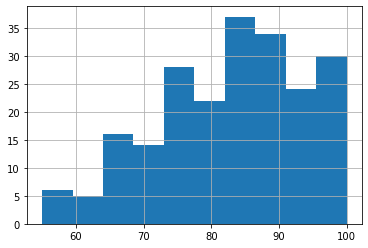

In [481]:
df_final["metascore"].hist()

In [482]:
df_final["metascore"].mean()

82.73611111111111

In [795]:
df_final["metascore"]=df_final["metascore"].fillna(df_final["metascore"].mean())

## Ajout colonne moyenne des notes et metascore

In [796]:
df_final["notes_moyenne"] = ((df_final["notes_proportionnelles"] + df_final["metascore"])/2)

In [487]:
df_final.head()

titres  date mois de sortie  notes  \
0                           Les Évadés   1994          march    9.3   
1                           Le parrain   1972        october    9.2   
2              Le parrain, 2ème partie   1974         august    9.0   
3  The Dark Knight : Le Chevalier noir   2008         august    9.0   
4                  12 Hommes en colère   1957      september    9.0   

                                     genre  \
0                                   Drama    
1                          Crime ,  Drama    
2                          Crime ,  Drama    
3    Action ,  Crime ,  Drama ,  Thriller    
4                          Crime ,  Drama    

                                         acteurs  \
0       Tim Robbins, Morgan Freeman, Bob Gunton    
1          Marlon Brando, Al Pacino, James Caan    
2      Al Pacino, Robert De Niro, Robert Duvall    
3   Christian Bale, Heath Ledger, Aaron Eckhart    
4       Henry Fonda, Lee J. Cobb, Martin Balsam    

                                          story_line             réalisateur  \
0      Chronicles the experiences of a formerly s...         Frank Darabont    
1      The Godfather "Don" Vito Corleone is the h...   Francis Ford Coppola    
2      The continuing saga of the Corleone crime ...   Francis Ford Coppola    
3      Set within a year after the events of Batm...      Christopher Nolan    
4      The defense and the prosecution have reste...           Sidney Lumet    

  nombre de votes                                      users_reviews  \
0         2393795  Can Hollywood, usually creating things for ent...   
1         1658277  I love this movie and all of the GF movies. I ...   
2         1152803  Francis Coppola and Mario Puzo continue their ...   
3         2355699  *level of enjoyment*\n#10\ntop tier - from sta...   
4          705991  '12 Angry Men' is an outstanding film. It is p...   

   metascore                    budget  notes_proportionnelles  durée_minutes  \
0       80.0   $25,000,000                                93.0          142.0   
1      100.0    $6,000,000                                92.0          175.0   
2       90.0   $13,000,000                                90.0          202.0   
3       84.0  $185,000,000                                90.0          152.0   
4       96.0      $350,000                                90.0           96.0   

   notes_moyenne  
0           86.5  
1           96.0  
2           90.0  
3           87.0  
4           93.0

In [488]:
df_final["notes_moyenne"].describe()

count    250.000000
mean      82.878056
std        5.272409
min       69.000000
25%       80.000000
50%       82.934028
75%       86.500000
max       96.000000
Name: notes_moyenne, dtype: float64

In [797]:
(df_final["notes_moyenne"] >= 85).value_counts()

False    158
True      92
Name: notes_moyenne, dtype: int64

## On travaille sur le dataset où il y a les notes moyennes au dessus de 85

In [798]:
df = df_final[ (df_final["notes_moyenne"]  >= 85) ]

In [683]:
df.head()

titres  date mois de sortie  notes  \
0                           Les Évadés   1994          march    9.3   
1                           Le parrain   1972        october    9.2   
2              Le parrain, 2ème partie   1974         august    9.0   
3  The Dark Knight : Le Chevalier noir   2008         august    9.0   
4                  12 Hommes en colère   1957      september    9.0   

                                     genre  \
0                                   Drama    
1                          Crime ,  Drama    
2                          Crime ,  Drama    
3    Action ,  Crime ,  Drama ,  Thriller    
4                          Crime ,  Drama    

                                         acteurs  \
0       Tim Robbins, Morgan Freeman, Bob Gunton    
1          Marlon Brando, Al Pacino, James Caan    
2      Al Pacino, Robert De Niro, Robert Duvall    
3   Christian Bale, Heath Ledger, Aaron Eckhart    
4       Henry Fonda, Lee J. Cobb, Martin Balsam    

                                          story_line             réalisateur  \
0      Chronicles the experiences of a formerly s...         Frank Darabont    
1      The Godfather "Don" Vito Corleone is the h...   Francis Ford Coppola    
2      The continuing saga of the Corleone crime ...   Francis Ford Coppola    
3      Set within a year after the events of Batm...      Christopher Nolan    
4      The defense and the prosecution have reste...           Sidney Lumet    

  nombre de votes                                      users_reviews  \
0         2393795  Can Hollywood, usually creating things for ent...   
1         1658277  I love this movie and all of the GF movies. I ...   
2         1152803  Francis Coppola and Mario Puzo continue their ...   
3         2355699  *level of enjoyment*\n#10\ntop tier - from sta...   
4          705991  '12 Angry Men' is an outstanding film. It is p...   

   metascore                    budget  notes_proportionnelles  durée_minutes  \
0       80.0   $25,000,000                                93.0          142.0   
1      100.0    $6,000,000                                92.0          175.0   
2       90.0   $13,000,000                                90.0          202.0   
3       84.0  $185,000,000                                90.0          152.0   
4       96.0      $350,000                                90.0           96.0   

   notes_moyenne  
0           86.5  
1           96.0  
2           90.0  
3           87.0  
4           93.0

In [499]:
# La médiane de notes
mediane_notes = df["notes_moyenne"].mode()
print("La médiane des notes est : " + format(mediane_notes))

# La moyenne des notes
moyenne_notes = df["notes_moyenne"].mean()
print("La moyenne des notes est : " + format(moyenne_notes))

La médiane des notes est : 0    85.5
dtype: float64
La moyenne des notes est : 88.22282608695652


## On affiche le nombre de votes en moyenne

In [503]:
# Affiche le de nombre de votes en moyenne
df["nombre de votes"].mean()

611707.5760869565

## Mois de sortie de films

In [504]:
# On voit où sont sortie le plus de films top rated

df_mois_sortie=(df
 .groupby(["mois de sortie"])
 .size()
 .reset_index()

)
df_mois_sortie

mois de sortie   0
0           april   8
1          august   2
2        december  10
3        february   3
4         january   5
5            july   8
6            june   6
7           march  12
8             may   5
9        november   6
10        october  14
11      september  13

In [505]:
# On change le nom de la colonne en Nb_sortie
df_mois_sortie["Nb_sortie"]=df_mois_sortie[0]

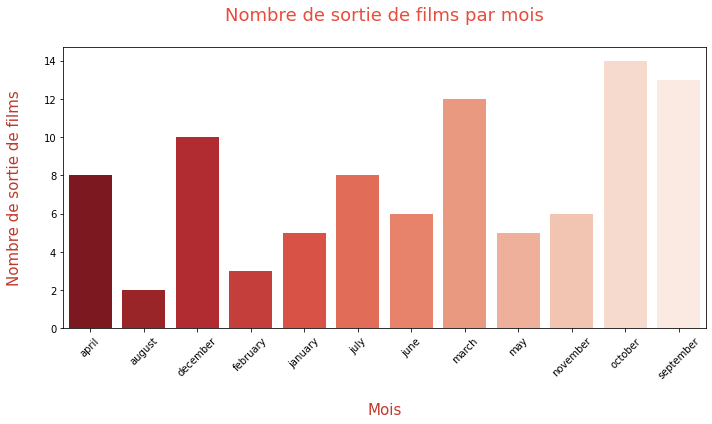

In [506]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=df_mois_sortie['mois de sortie'], y=df_mois_sortie['Nb_sortie'], palette="Reds_r")
plt.xlabel('\nMois', fontsize=15, color='#c0392b')
plt.ylabel("Nombre de sortie de films\n", fontsize=15, color='#c0392b')
plt.title("Nombre de sortie de films par mois\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

--> On observe que les mois de sortie les plus intéressant sont Septembre, Octobre et Mars

## Durée

<AxesSubplot:>

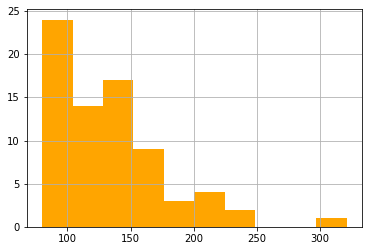

In [510]:
# On observe la répartition de la colonne durée_minutes
df['durée_minutes'].hist(color="orange")

In [511]:
# Moyenne des durée de films
df['durée_minutes'].mean()

132.8108108108108

In [512]:
df_duree=(df
 .groupby(["durée_minutes"])
 .size()
 .reset_index()

)
df_duree

durée_minutes  0
0            80.0  1
1            81.0  1
2            87.0  2
3            88.0  3
4            89.0  1
5            91.0  2
6            95.0  2
7            96.0  3
8            97.0  1
9            98.0  1
10           99.0  1
11          100.0  1
12          102.0  1
13          103.0  3
14          104.0  1
15          106.0  1
16          107.0  1
17          108.0  2
18          109.0  1
19          112.0  1
20          114.0  1
21          116.0  1
22          117.0  2
23          118.0  3
24          119.0  1
25          130.0  2
26          132.0  1
27          133.0  2
28          134.0  1
29          136.0  1
30          137.0  1
31          138.0  2
32          142.0  2
33          146.0  1
34          147.0  1
35          150.0  1
36          151.0  1
37          152.0  1
38          153.0  1
39          154.0  1
40          158.0  1
41          160.0  2
42          161.0  1
43          162.0  1
44          169.0  1
45          175.0  1
46          178.0  1
47          179.0  1
48          195.0  1
49          201.0  1
50          202.0  1
51          207.0  1
52          212.0  1
53          228.0  1
54          238.0  1
55          321.0  1

In [513]:
# On change le nom de la colonne en Nb_duree
df_duree["Nb_duree"]=df_duree[0]

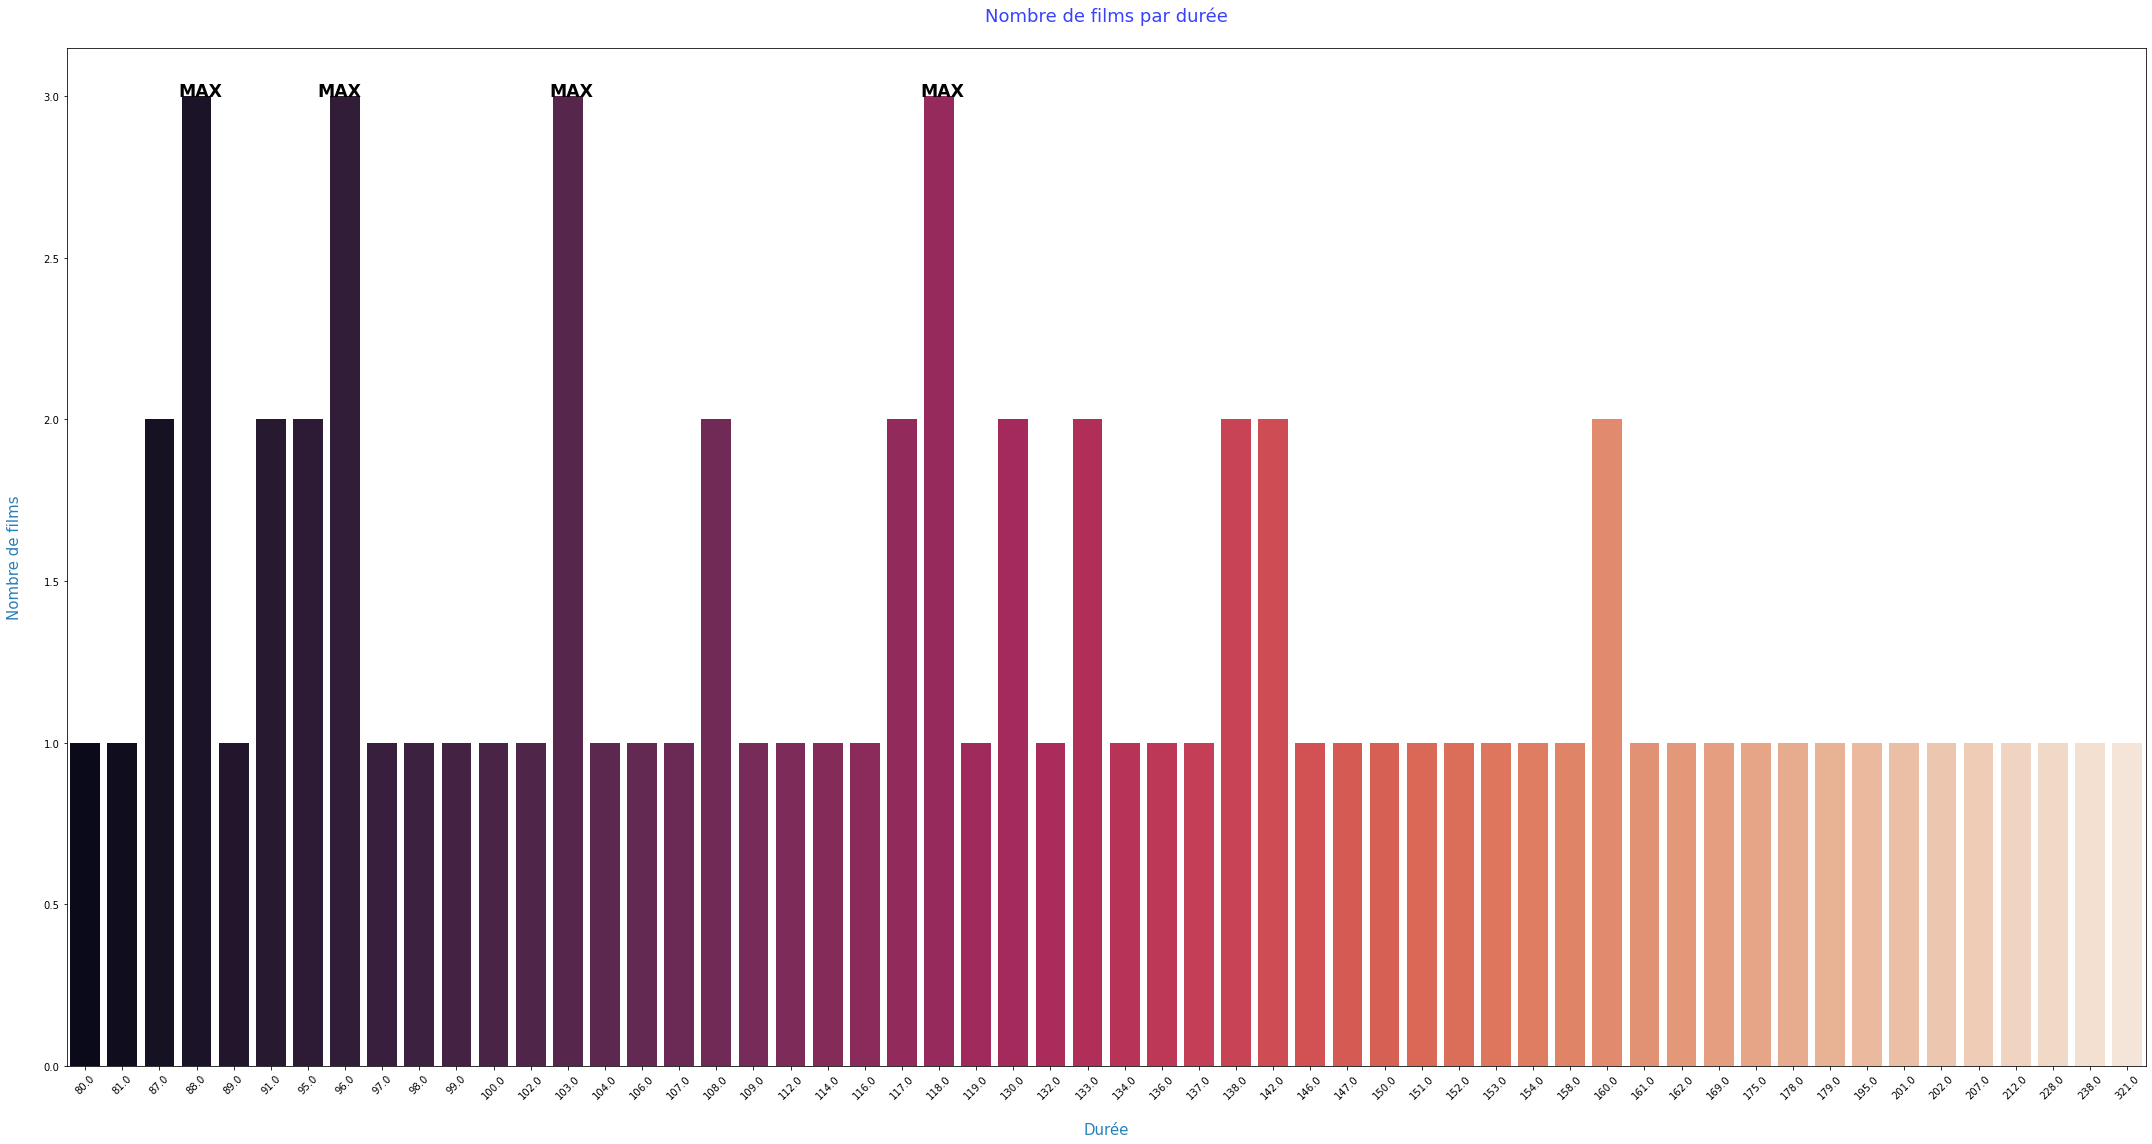

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,16))
sns.barplot(x=df_duree['durée_minutes'], y=df_duree['Nb_duree'], palette="rocket")
plt.xlabel('\nDurée', fontsize=15, color='#2980b9')
plt.ylabel("Nombre de films\n", fontsize=15, color='#2980b9')
plt.title("Nombre de films par durée\n", fontsize=18, color='#3742fa')
plt.text(12.5, 3, r'MAX', size = 'xx-large', weight = 'extra bold')
plt.text(6.25, 3, r'MAX', size = 'xx-large', weight = 'extra bold')
plt.text(2.5, 3, r'MAX', size = 'xx-large', weight = 'extra bold')
plt.text(22.5, 3, r'MAX', size = 'xx-large', weight = 'extra bold')
plt.xticks(rotation= 45)
plt.tight_layout()

--> On observe que les meilleurs films ont pour durée 88 min, 96 min, 103 min et enfin 118 min

## #Genres

In [534]:
#(df["genre"].str.contains("Drama")).value_counts()

True     71
False    21
Name: genre, dtype: int64

In [532]:
#(df["genre"].str.contains("Crime")).value_counts()

False    73
True     19
Name: genre, dtype: int64

In [535]:
#(df["genre"].str.contains("Action")).value_counts()

False    81
True     11
Name: genre, dtype: int64

In [536]:
#(df["genre"].str.contains("Thriller")).value_counts()

False    73
True     19
Name: genre, dtype: int64

In [537]:
#(df["genre"].str.contains("Romance")).value_counts()

False    78
True     14
Name: genre, dtype: int64

In [545]:
#(df["genre"].str.contains("Mystery")).value_counts()

False    77
True     15
Name: genre, dtype: int64

In [547]:
#(df["genre"].str.contains("Western")).value_counts()

False    89
True      3
Name: genre, dtype: int64

In [552]:
#(df["genre"].str.contains("Adventure")).value_counts()

False    70
True     22
Name: genre, dtype: int64

In [553]:
#(df["genre"].str.contains("Fantasy")).value_counts()

False    80
True     12
Name: genre, dtype: int64

In [554]:
#(df["genre"].str.contains("Horror")).value_counts()

False    90
True      2
Name: genre, dtype: int64

In [555]:
#(df["genre"].str.contains("Comedy")).value_counts()

False    76
True     16
Name: genre, dtype: int64

In [556]:
#(df["genre"].str.contains("Sci-Fi")).value_counts()

False    84
True      8
Name: genre, dtype: int64

In [557]:
#(df["genre"].str.contains("Biography")).value_counts()

False    83
True      9
Name: genre, dtype: int64

In [558]:
#(df["genre"].str.contains("History")).value_counts()

False    83
True      9
Name: genre, dtype: int64

In [559]:
#(df["genre"].str.contains("Family")).value_counts()

False    81
True     11
Name: genre, dtype: int64

In [560]:
#(df["genre"].str.contains("War")).value_counts()

False    79
True     13
Name: genre, dtype: int64

In [561]:
#(df["genre"].str.contains("Music")).value_counts()

False    85
True      7
Name: genre, dtype: int64

In [562]:
#(df["genre"].str.contains("Animation")).value_counts()

False    82
True     10
Name: genre, dtype: int64

In [563]:
'''df["Romance"] = (df["genre"].str.contains("Romance")).astype(int)
df["Thriller"] = (df["genre"].str.contains("Thriller")).astype(int)
df["Action"] = (df["genre"].str.contains("Action")).astype(int)
df["Crime"] = (df["genre"].str.contains("Crime")).astype(int)
df["Drama"] = (df["genre"].str.contains("Drama")).astype(int)
df["Mystery"] = (df["genre"].str.contains("Mystery")).astype(int)
df["Western"] = (df["genre"].str.contains("Western")).astype(int)
df["Adventure"] = (df["genre"].str.contains("Adventure")).astype(int)
df["Fantasy"] = (df["genre"].str.contains("Fantasy")).astype(int)
df["Horror"] = (df["genre"].str.contains("Horror")).astype(int)
df["Comedy"] = (df["genre"].str.contains("Comedy")).astype(int)
df["Sci-Fi"] = (df["genre"].str.contains("Sci-Fi")).astype(int)
df["Biography"] = (df["genre"].str.contains("Biography")).astype(int)
df["History"] = (df["genre"].str.contains("History")).astype(int)
df["Family"] = (df["genre"].str.contains("Family")).astype(int)
df["War"] = (df["genre"].str.contains("War")).astype(int)
df["Music"] = (df["genre"].str.contains("Music")).astype(int)
df["Animation"] = (df["genre"].str.contains("Animation")).astype(int)'''

<ipython-input-563-773e7b4d6585>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Romance"] = (df["genre"].str.contains("Romance")).astype(int)
<ipython-input-563-773e7b4d6585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Thriller"] = (df["genre"].str.contains("Thriller")).astype(int)
<ipython-input-563-773e7b4d6585>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [564]:
df

titres  date mois de sortie  notes  \
0                             Les Évadés   1994          march    9.3   
1                             Le parrain   1972        october    9.2   
2                Le parrain, 2ème partie   1974         august    9.0   
3    The Dark Knight : Le Chevalier noir   2008         august    9.0   
4                    12 Hommes en colère   1957      september    9.0   
..                                    ...   ...            ...    ...   
239            Du rififi chez les hommes   1955          april    8.1   
240                        Before Sunset   2004          march    8.1   
241                   Fanny et Alexandre   1982          march    8.1   
244                Trois couleurs: Rouge   1994      september    8.1   
249      L'homme qui tua Liberty Valance   1962        october    8.1   

                                       genre  \
0                                     Drama    
1                            Crime ,  Drama    
2                            Crime ,  Drama    
3      Action ,  Crime ,  Drama ,  Thriller    
4                            Crime ,  Drama    
..                                       ...   
239              Crime ,  Drama ,  Thriller    
240                        Drama ,  Romance    
241                                   Drama    
244             Drama ,  Mystery ,  Romance    
249                        Drama ,  Western    

                                               acteurs  \
0             Tim Robbins, Morgan Freeman, Bob Gunton    
1                Marlon Brando, Al Pacino, James Caan    
2            Al Pacino, Robert De Niro, Robert Duvall    
3         Christian Bale, Heath Ledger, Aaron Eckhart    
4             Henry Fonda, Lee J. Cobb, Martin Balsam    
..                                                 ...   
239          Jean Servais, Carl Möhner, Robert Manuel    
240        Ethan Hawke, Julie Delpy, Vernon Dobtcheff    
241   Bertil Guve, Pernilla Allwin, Kristina Adolph...   
244   Irène Jacob, Jean-Louis Trintignant, Frédériq...   
249             James Stewart, John Wayne, Vera Miles    

                                            story_line  \
0        Chronicles the experiences of a formerly s...   
1        The Godfather "Don" Vito Corleone is the h...   
2        The continuing saga of the Corleone crime ...   
3        Set within a year after the events of Batm...   
4        The defense and the prosecution have reste...   
..                                                 ...   
239      After five years in prison, Tony le Stépha...   
240      Early thirty-something American Jesse Wall...   
241      It's the early twentieth century Sweden. A...   
244      Valentine is a young model living in Genev...   
249      When Senator Ransom Stoddard returns home ...   

                réalisateur  nombre de votes  \
0           Frank Darabont           2393795   
1     Francis Ford Coppola           1658277   
2     Francis Ford Coppola           1152803   
3        Christopher Nolan           2355699   
4             Sidney Lumet            705991   
..                      ...              ...   
239           Jules Dassin             30460   
240      Richard Linklater            241571   
241         Ingmar Bergman             58592   
244   Krzysztof Kieslowski             93160   
249              John Ford             70226   

                                         users_reviews  ...  Fantasy Horror  \
0    Can Hollywood, usually creating things for ent...  ...        0      0   
1    I love this movie and all of the GF movies. I ...  ...        0      0   
2    Francis Coppola and Mario Puzo continue their ...  ...        0      0   
3    *level of enjoyment*\n#10\ntop tier - from sta...  ...        0      0   
4    '12 Angry Men' is an outstanding film. It is p...  ...        0      0   
..                                                 ...  ...      ...    ...   
239  RIFIFI (Jules Dassin - France 1955)To me, it s...  .

## Réalisateurs

In [591]:
# On voit les réalisateurs les plus souvent utilisés

df_real=(df
 .groupby(["réalisateur"])
 .size()
 .reset_index()

)
df_real

réalisateur  0
0                                     Akira Kurosawa   3
1                                   Alfred Hitchcock   4
2                                     Andrew Stanton   1
3       Andrew Stanton, Lee Unkrich (co-director)      1
4                                     Anurag Kashyap   1
..                                                ... ..
66                        Terry Gilliam, Terry Jones   1
67                                       Thomas Kail   1
68                                      Tom McCarthy   1
69   Victor Fleming, George Cukor (uncredited)    ...  1
70                                     William Wyler   1

[71 rows x 2 columns]

In [592]:
# On change le nom de la colonne en Nb_réal
df_real["Nb_réal"]=df_real[0]

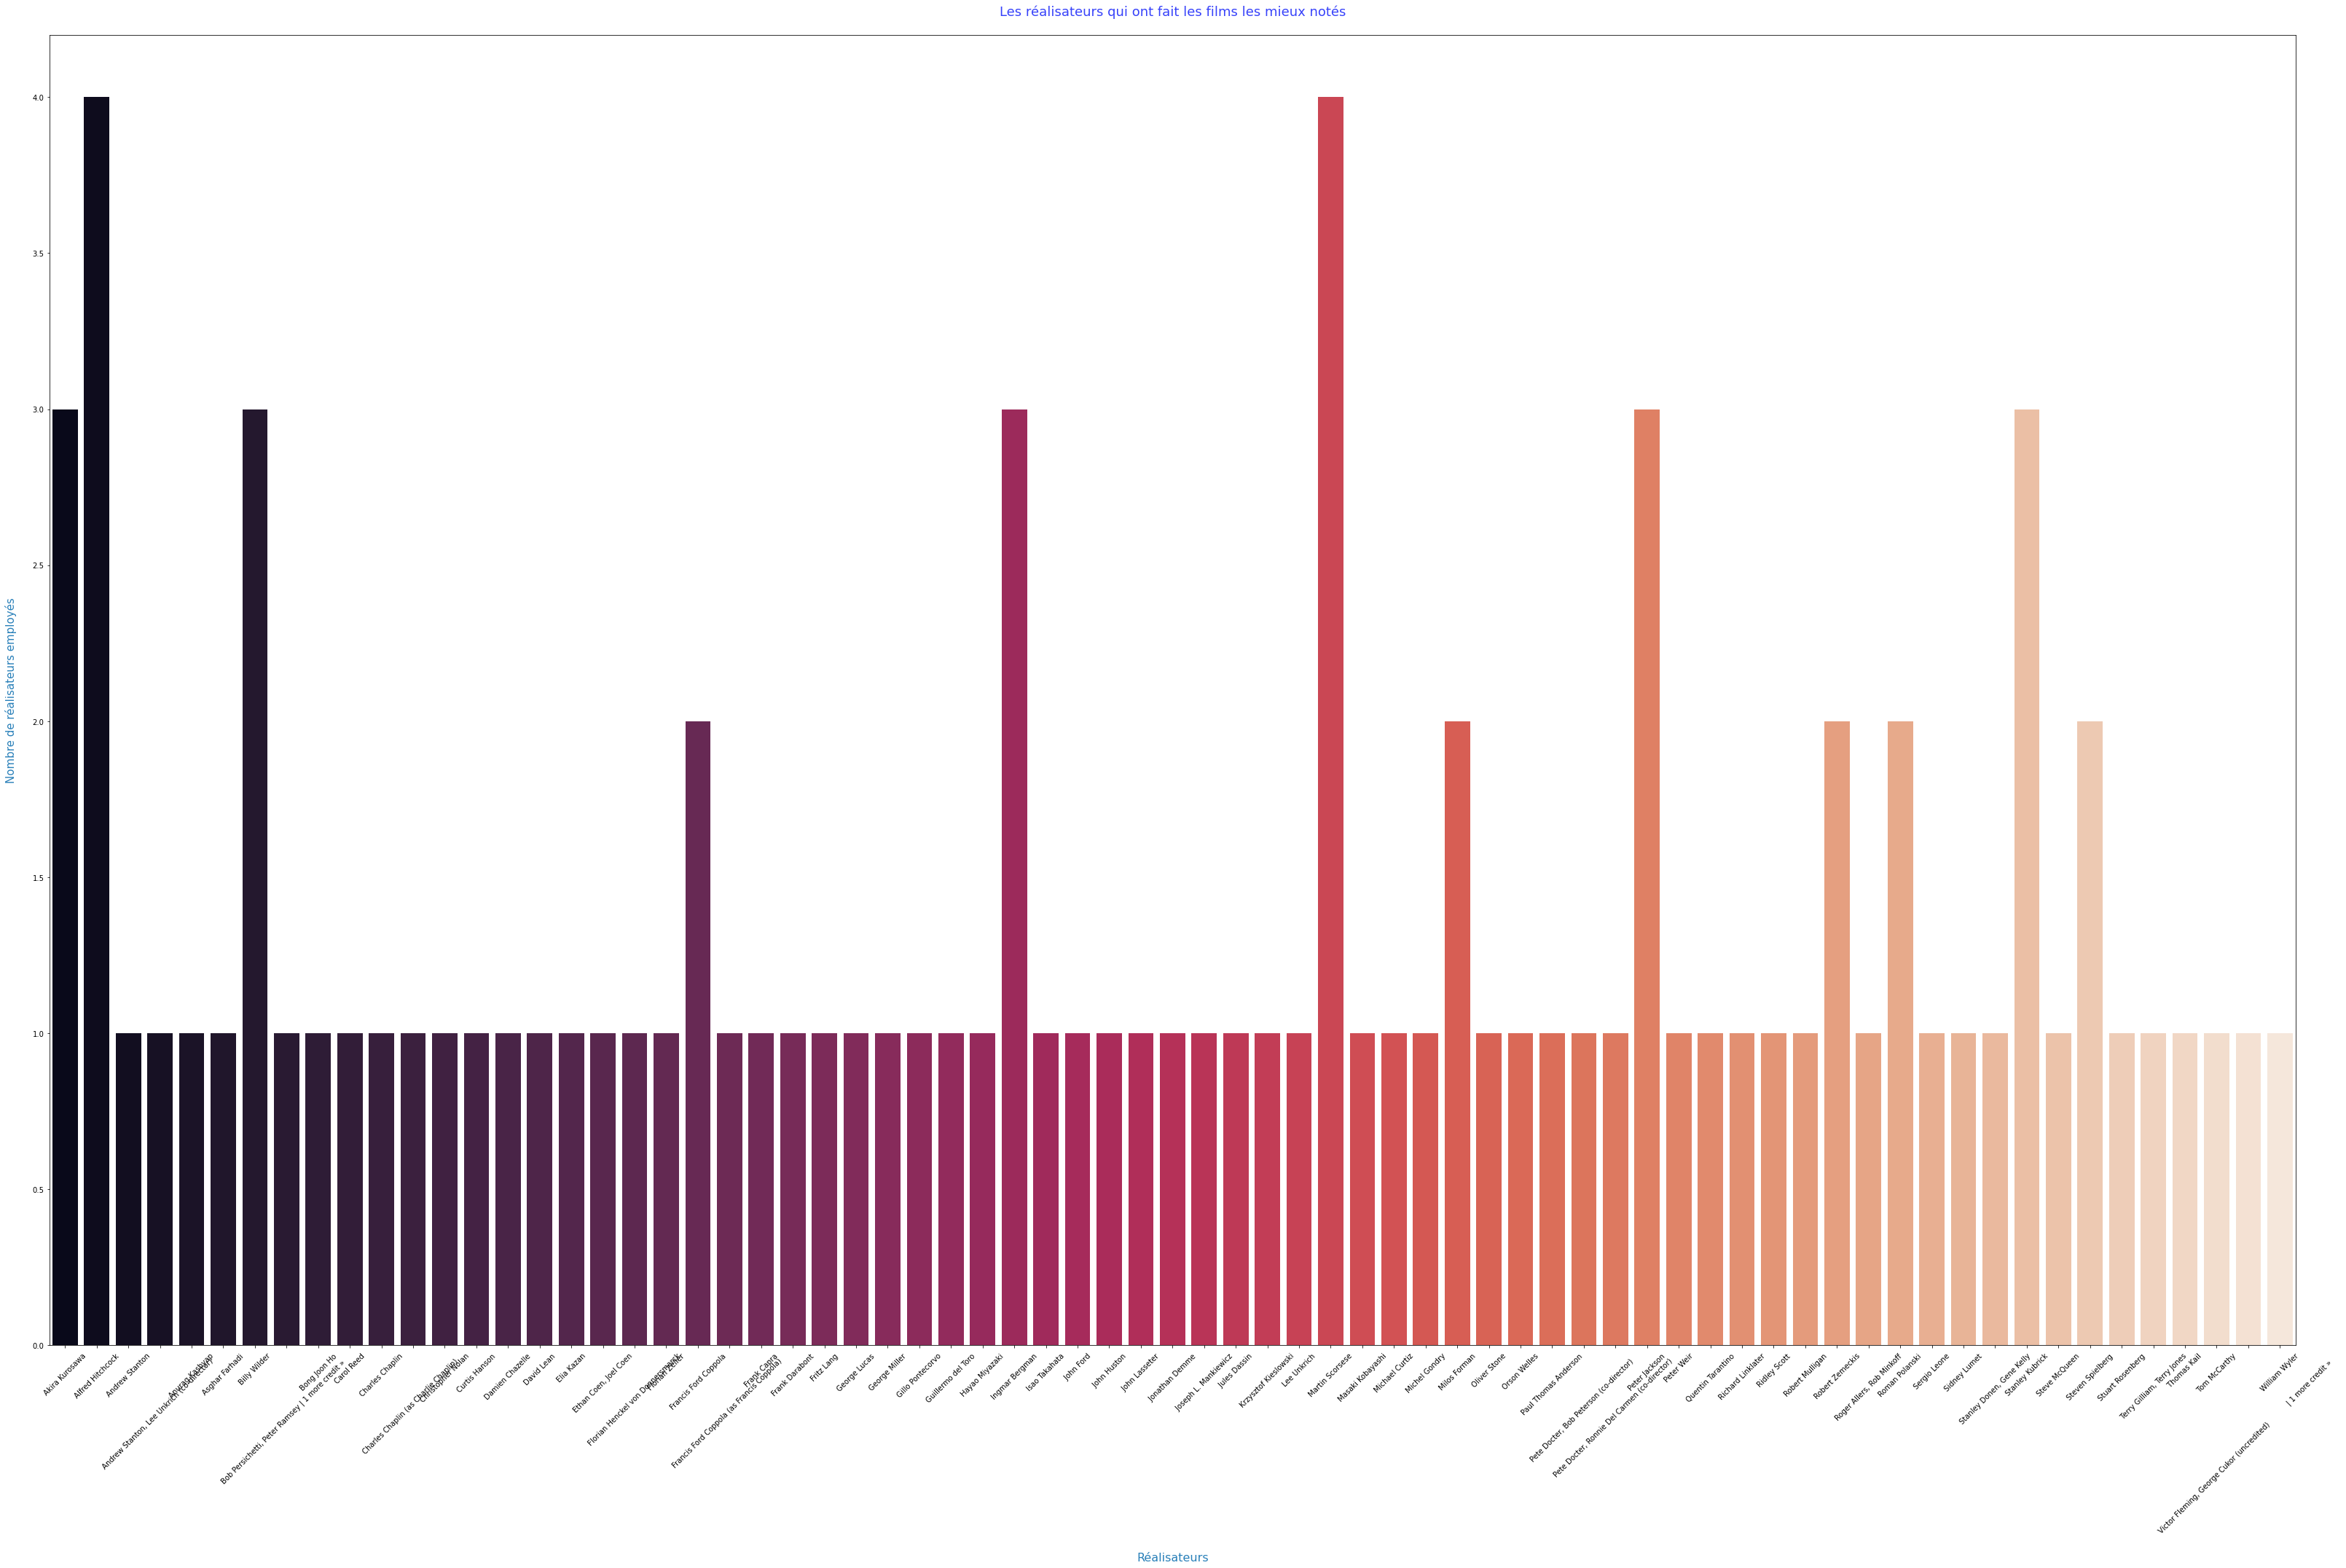

In [600]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(45,30))
sns.barplot(x=df_real['réalisateur'], y=df_real['Nb_réal'], palette="rocket")
plt.xlabel('\nRéalisateurs', fontsize=16, color='#2980b9')
plt.ylabel("Nombre de réalisateurs employés\n", fontsize=15, color='#2980b9')
plt.title("Les réalisateurs qui ont fait les films les mieux notés\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

## Budget

In [604]:
# On enlève le "$" dans la colonne budget et les ","
df["budget"] = [(str(i).replace("$", "")) for i in df["budget"]]
df["budget"] = [(str(i).replace(",", "")) for i in df["budget"]]

<ipython-input-604-7367ad436b78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"] = [(str(i).replace("$", "")) for i in df["budget"]]
<ipython-input-604-7367ad436b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"] = [(str(i).replace(",", "")) for i in df["budget"]]


In [607]:
# On change le type de budget
df["budget"] = df["budget"].astype(float)

<ipython-input-607-54863072b2d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"] = df["budget"].astype(float)


<AxesSubplot:>

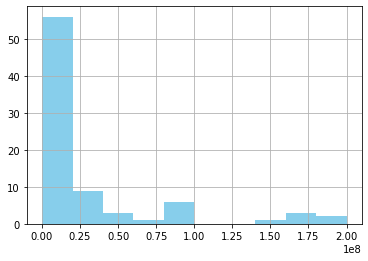

In [610]:
df["budget"].hist(color="skyblue")

In [611]:
df["budget"].mean()

30503464.0

In [615]:
df["budget"]=df["budget"].fillna(df["budget"].mean())

<ipython-input-615-360a0711fb0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["budget"]=df["budget"].fillna(df["budget"].mean())


In [616]:
df["budget"].isna().sum()

0

In [617]:
df_budget=(df
 .groupby(["budget"])
 .size()
 .reset_index()

)
df_budget

budget   0
0      150000.0   1
1      250000.0   1
2      350000.0   1
3      500000.0   1
4      800000.0   1
5      806947.0   1
6      839727.0   1
7      910000.0   1
8      927262.0   1
9      935000.0   1
10     950000.0   1
11    1000000.0   1
12    1200000.0   1
13    1300000.0   1
14    1400000.0   1
15    1500000.0   2
16    1800000.0   1
17    2000000.0   2
18    2479000.0   1
19    2540800.0   1
20    2700000.0   1
21    2883848.0   1
22    3000000.0   3
23    3101000.0   1
24    3180000.0   1
25    3200000.0   2
26    3300000.0   1
27    3700000.0   1
28    3977000.0   1
29    6000000.0   4
30    8000000.0   1
31   11000000.0   3
32   11400000.0   1
33   11500000.0   1
34   13000000.0   1
35   15000000.0   2
36   18000000.0   2
37   19000000.0   4
38   20000000.0   3
39   22000000.0   1
40   25000000.0   4
41   30000000.0   1
42   30503464.0  11
43   31500000.0   1
44   35000000.0   2
45   45000000.0   1
46   55000000.0   1
47   60000000.0   1
48   70000000.0   1
49   90000000.0   2
50   93000000.0   1
51   94000000.0   3
52  150000000.0   1
53  175000000.0   2
54  180000000.0   1
55  185000000.0   1
56  200000000.0   1

In [618]:
df_budget["Nb_budget"]= df_budget[0]

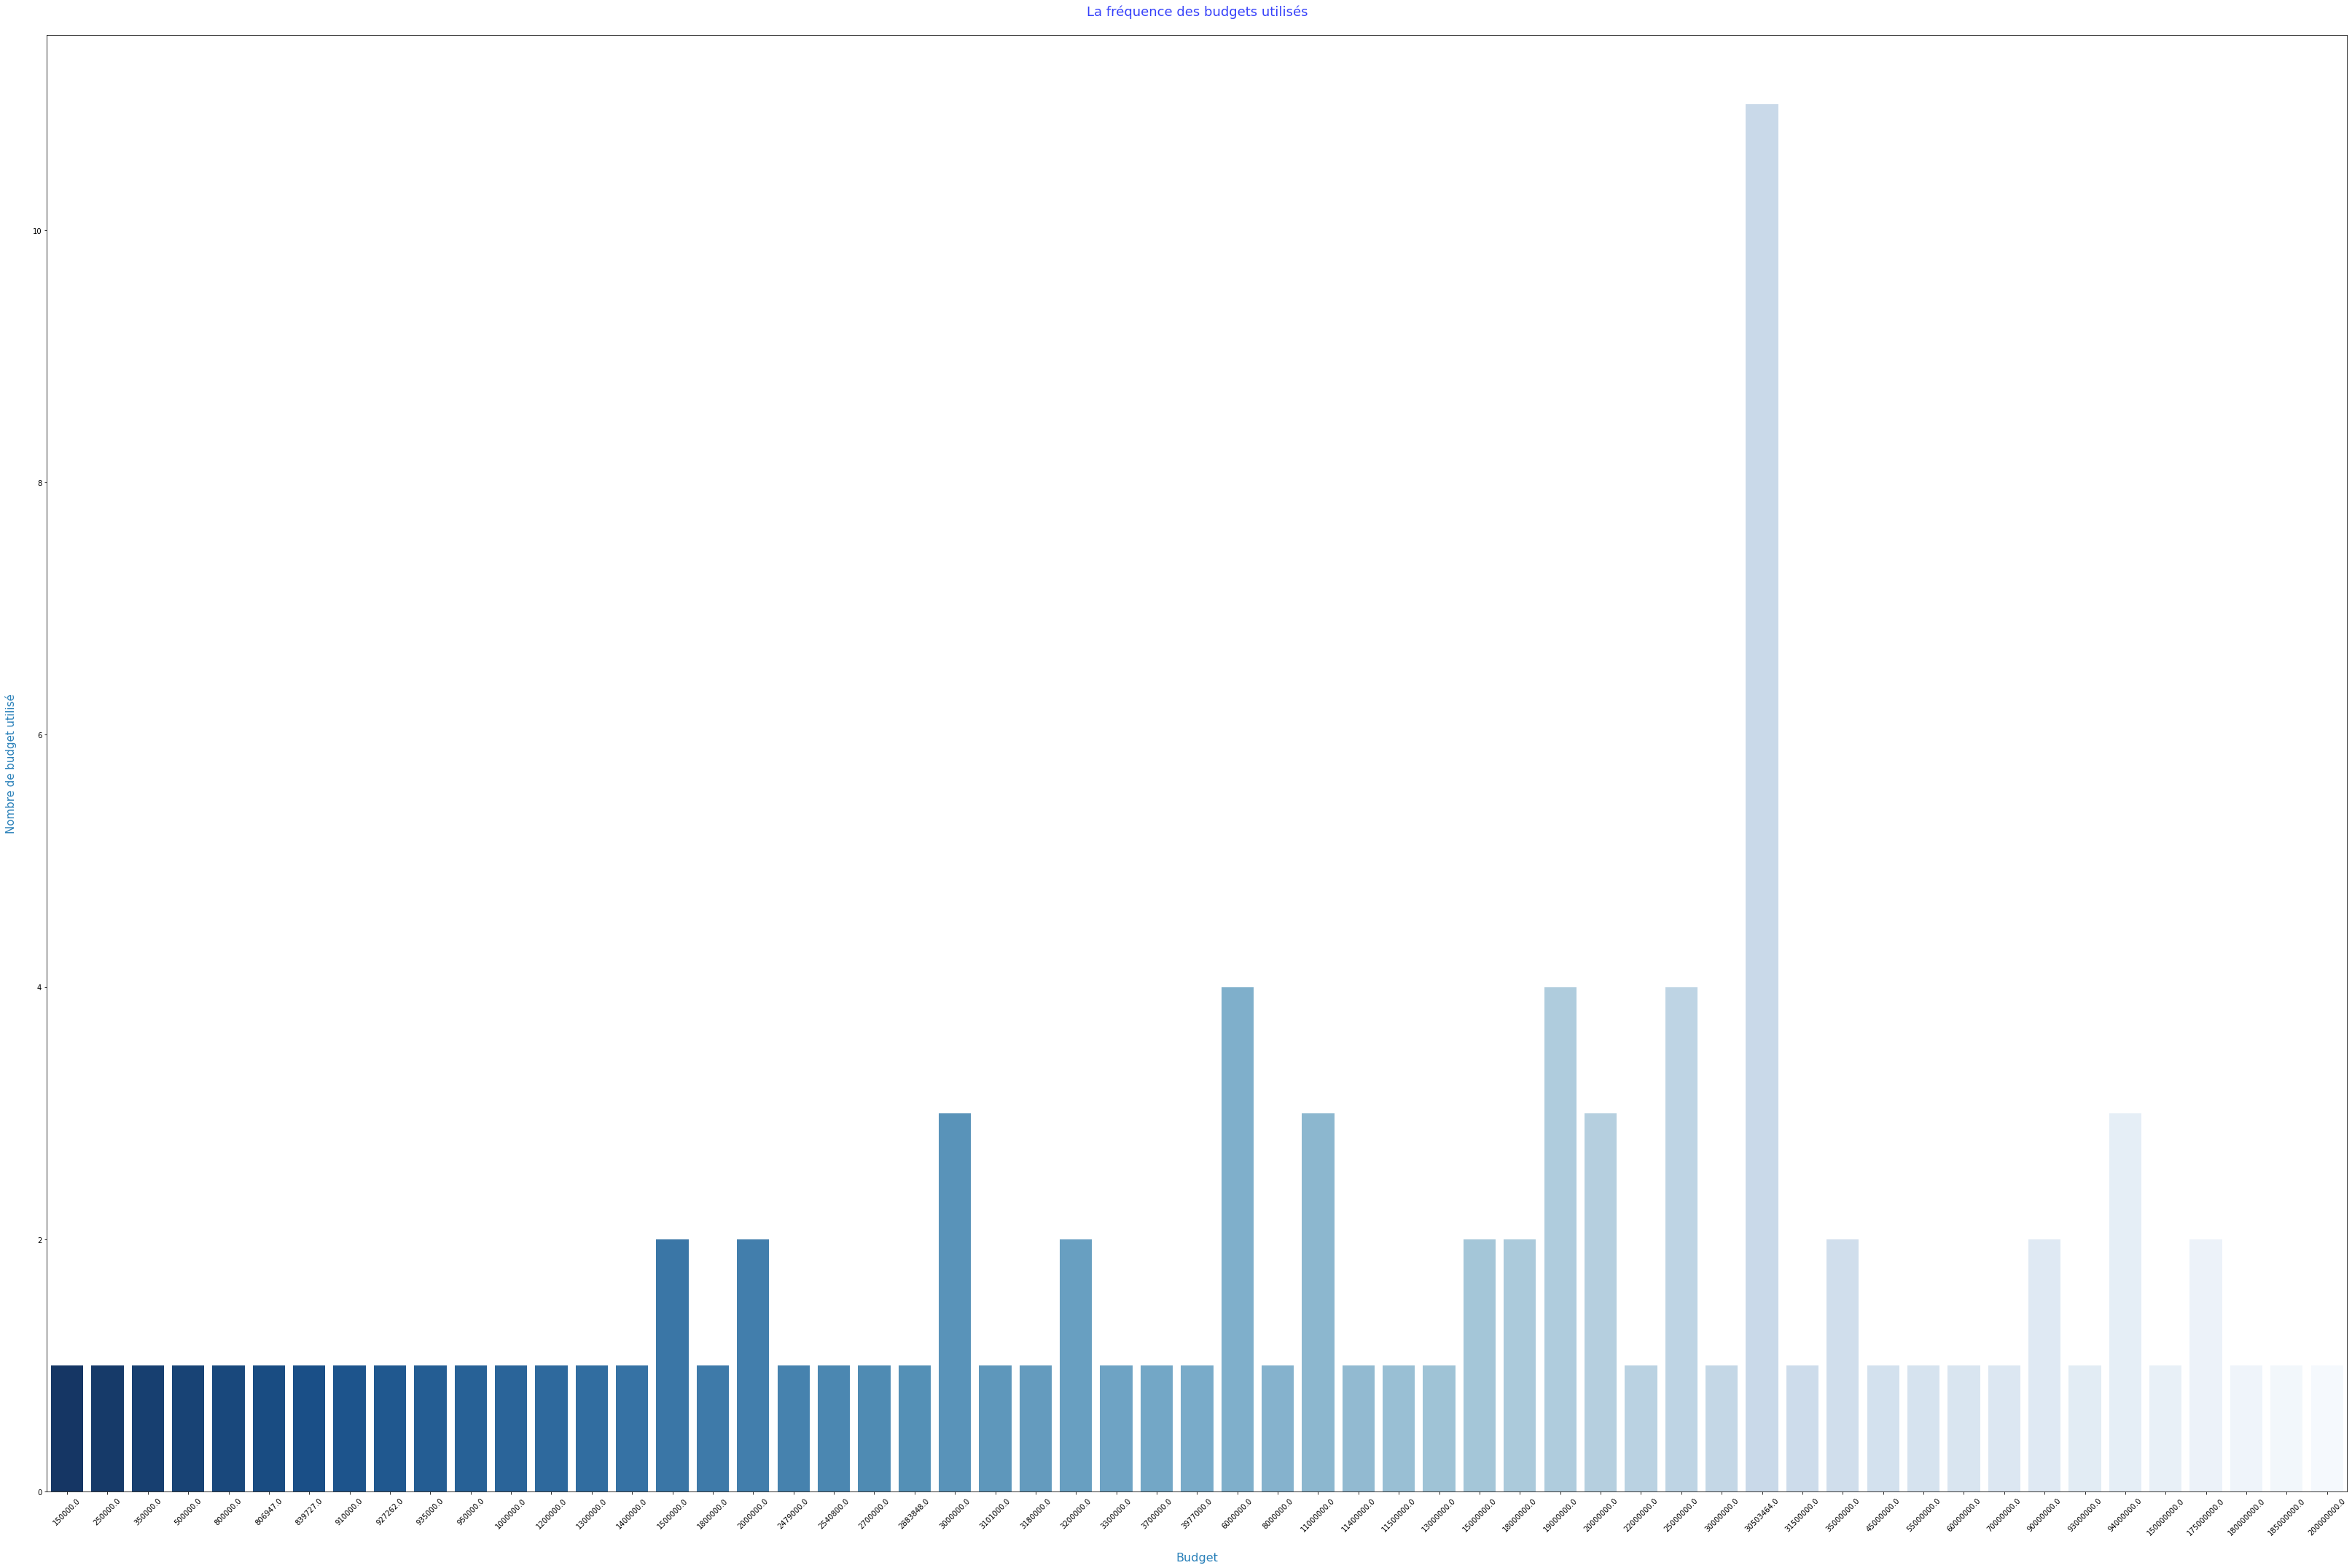

In [621]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(45,30))
sns.barplot(x=df_budget["budget"], y=df_budget["Nb_budget"], palette="Blues_r")
plt.xlabel('\nBudget', fontsize=16, color='#2980b9')
plt.ylabel("Nombre de budget utilisé\n", fontsize=15, color='#2980b9')
plt.title("La fréquence des budgets utilisés\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

## NLP

In [ ]:
!pip install nltk

In [331]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re
import string

In [696]:
def custom_preprocessor(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''

    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [640]:
df['users_reviews']=df['users_reviews'].apply(custom_preprocessor)

<ipython-input-640-e3f47f218960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['users_reviews']=df['users_reviews'].apply(custom_preprocessor)


In [ ]:
nltk.download()

In [311]:
# Installation bibliothèque gensim
pip install gensim

     |████████████████████████████████| 23.9 MB 28.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [313]:
# Installation bibliothèque python-Levenshtein
pip install python-Levenshtein

     |████████████████████████████████| 50 kB 1.9 MB/s eta 0:00:011
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp38-cp38-macosx_10_9_x86_64.whl size=80608 sha256=1ba9e10476311ad03a493cf1b2e1bacf4965ed60e4dae6c52a2495e80250b0de
  Stored in directory: /Users/sheidamohammadi/Library/Caches/pip/wheels/d7/0c/76/042b46eb0df65c3ccd0338f791210c55ab79d209bcc269e2c7
Successfully built python-Levenshtein
Note: you may need to restart the kernel to use updated packages.


In [314]:
# import des bibliothèques utiles

from gensim.models import Word2Vec
import nltk
from gensim.models import KeyedVectors

from nltk.cluster import KMeansClusterer
import numpy as np 

from sklearn import cluster
from sklearn import metrics

# Les genres les plus fréquents

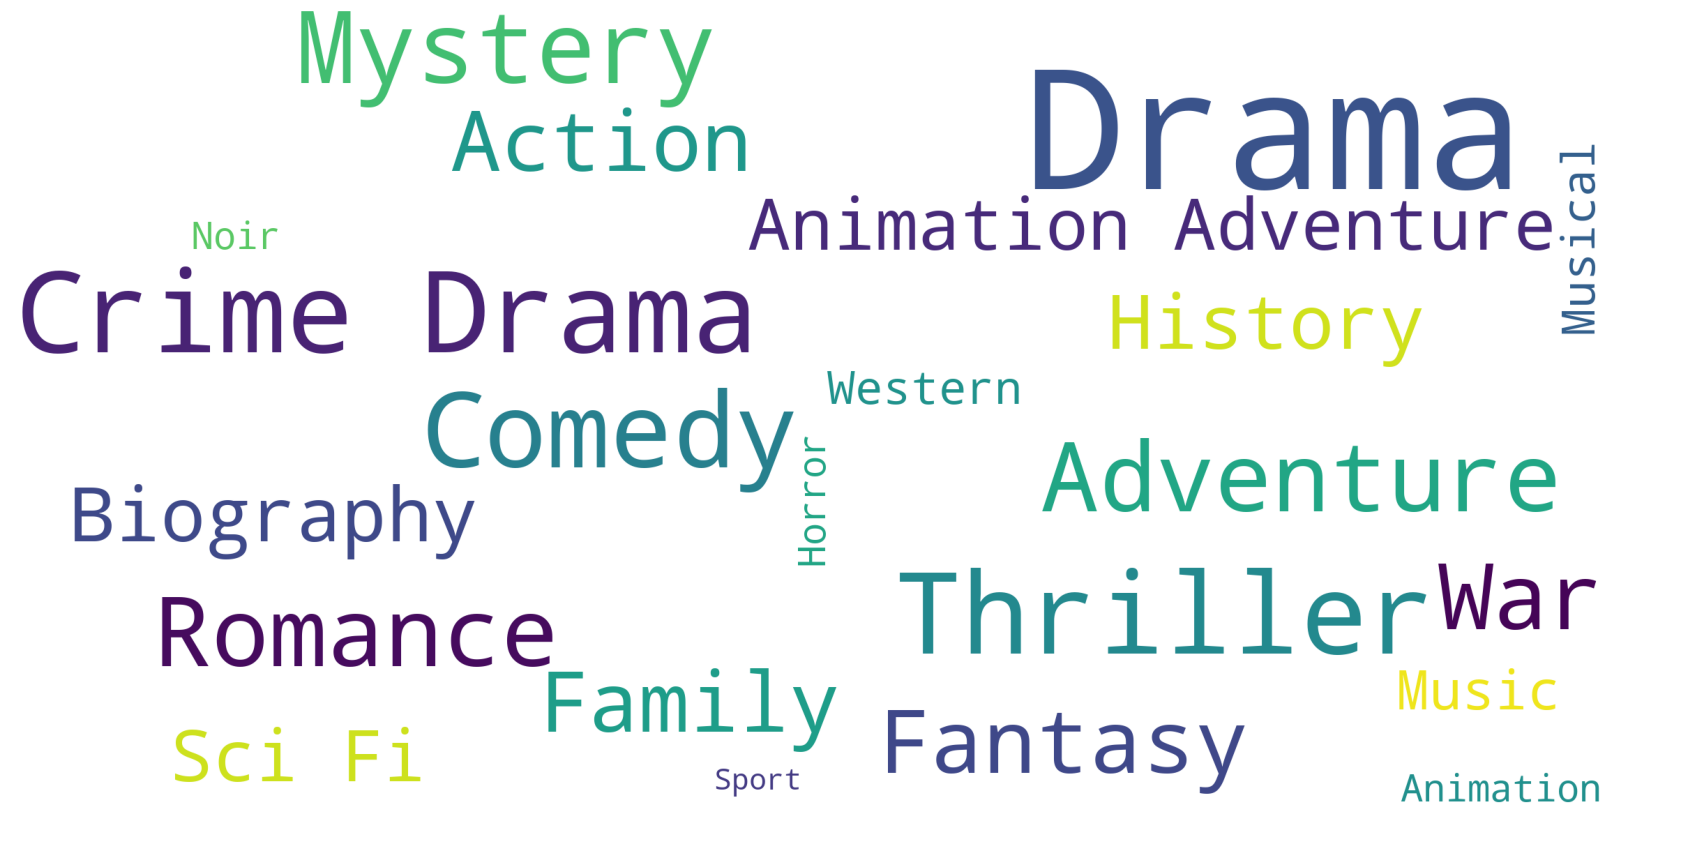

In [799]:
wordcloud = WordCloud(background_color='white',
        stopwords=new_stopwords_list,
        max_words=300,
        max_font_size=40,
        scale=6,
        random_state=1 ).generate(" ".join(df["genre"]))

plt.figure(1, figsize=(30, 30))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

# Acteurs les plus fréquents 

In [378]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [801]:
df['acteurs'] = [(str(i).replace(" ", "")) for i in df['acteurs']]

<ipython-input-801-a1bc1eea4ce4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acteurs'] = [(str(i).replace(" ", "")) for i in df['acteurs']]


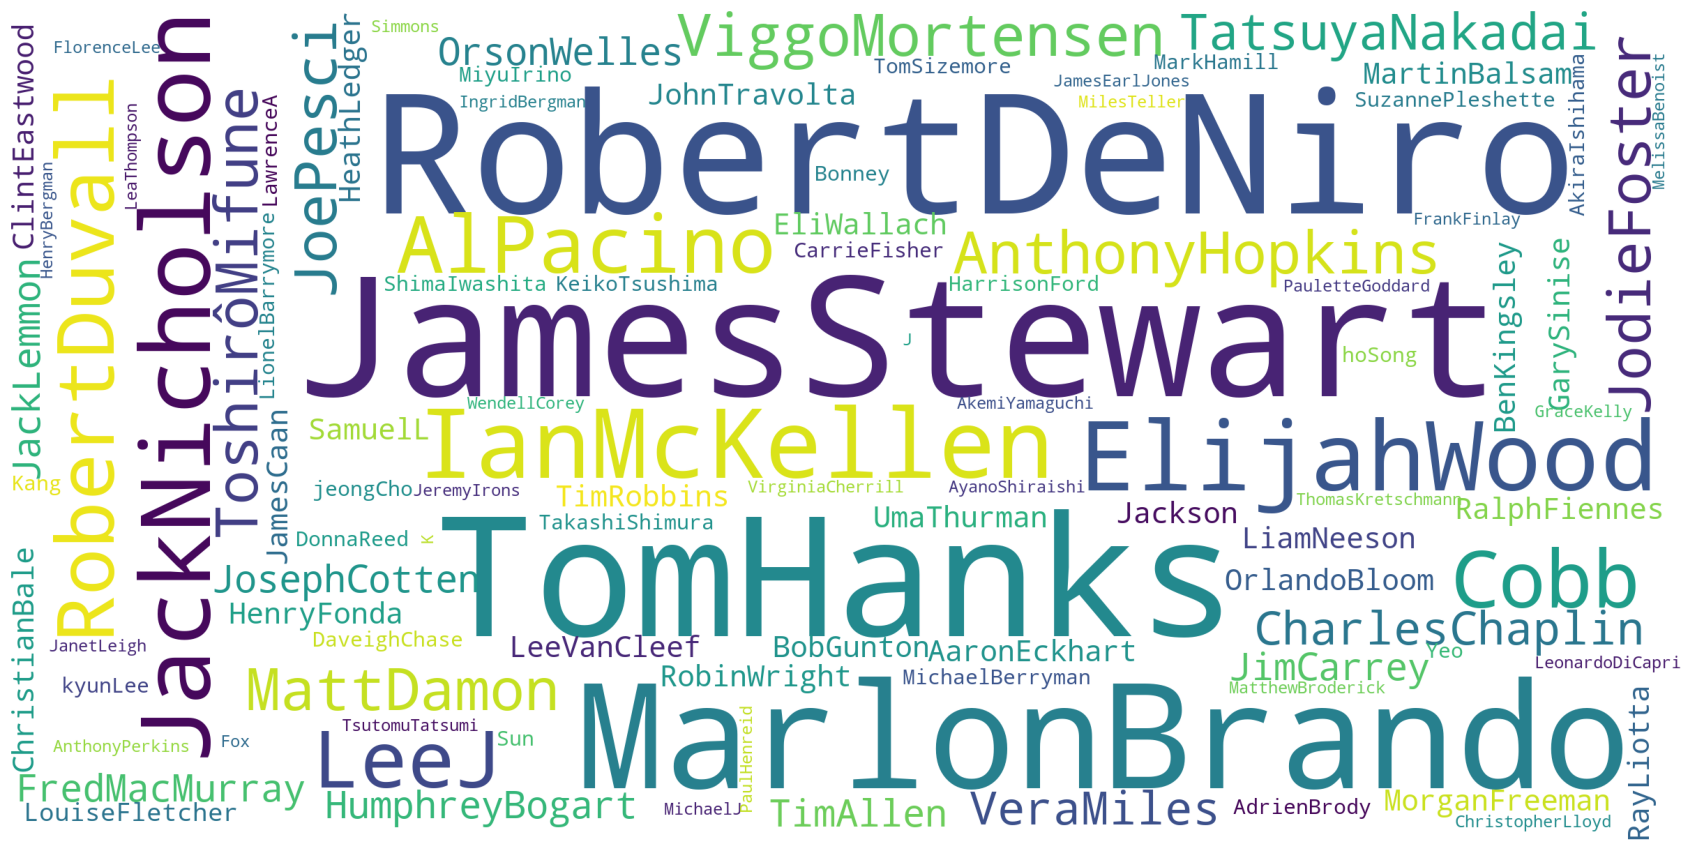

In [802]:
wordcloud = WordCloud(background_color='white',
        stopwords=new_stopwords_list,
        max_words=300,
        max_font_size=40,
        scale=6,
        random_state=1 ).generate(" ".join(df["acteurs"]))

plt.figure(1, figsize=(30, 30))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## Réalisateurs

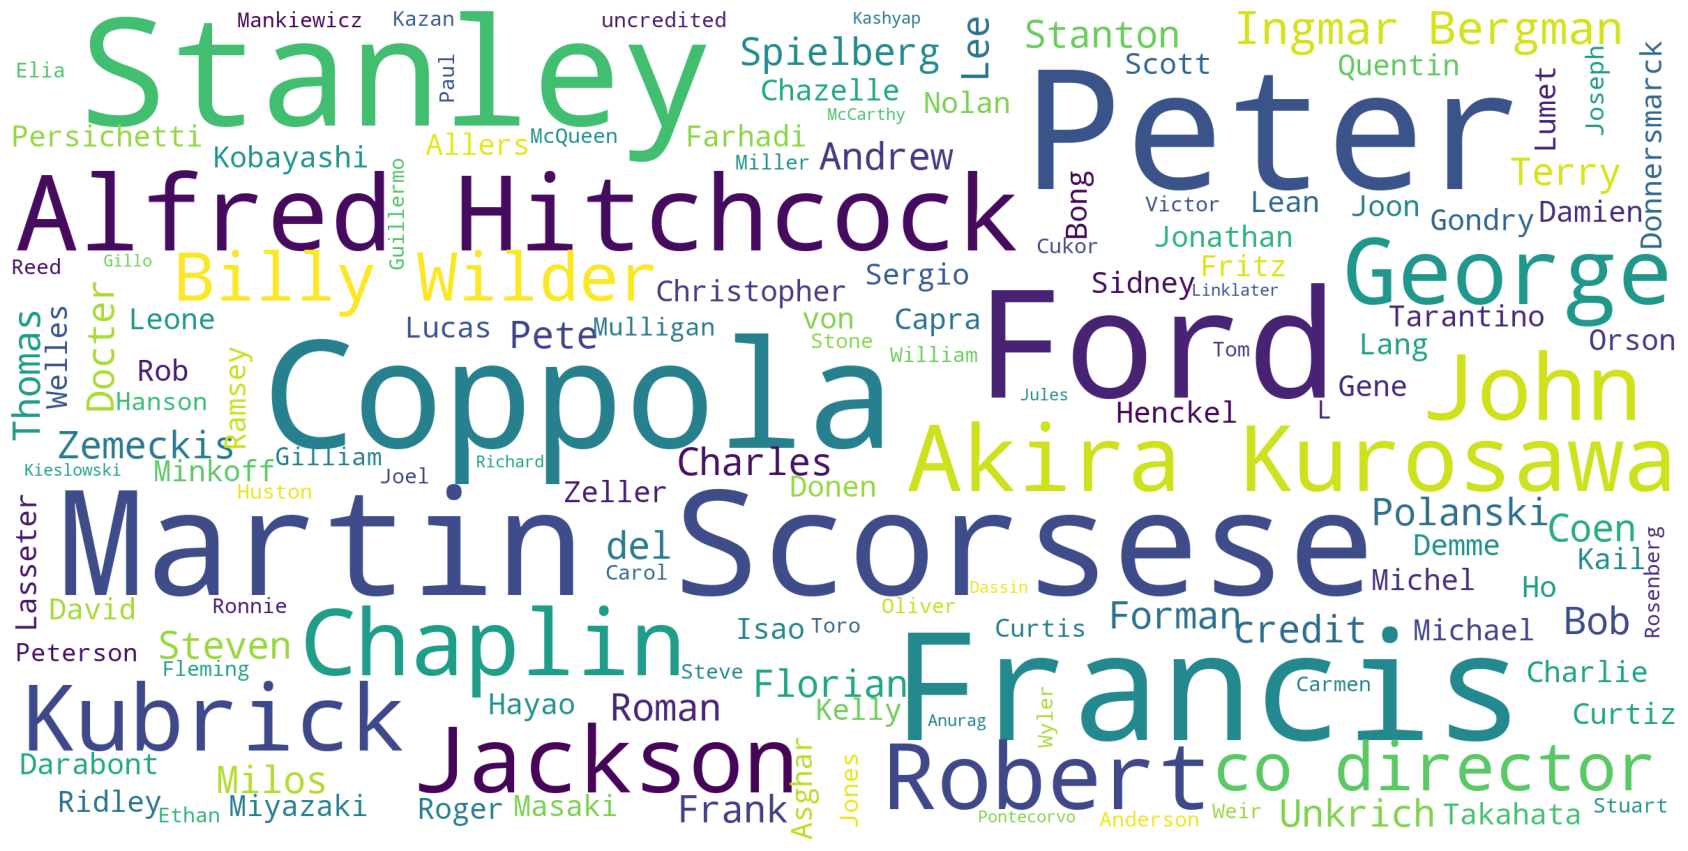

In [777]:
wordcloud = WordCloud(background_color='white',
        stopwords=new_stopwords_list,
        max_words=300,
        max_font_size=40,
        scale=6,
        random_state=1 ).generate(" ".join(df["réalisateur"]))

plt.figure(1, figsize=(30, 30))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## Story line

In [771]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['None','rififi','krzysztof','also','good','best','however','long','x','still','go','see','like','although','usually','movies','class' ,'one','puzo','seen','want','columns','rows','eyes','movie','film']
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)

{'than', "couldn't", 'over', 'their', 'at', 'she', "didn't", 'out', 'having', "wasn't", 'each', "weren't", 'want', 'now', 've', 'what', 'him', 'into', 'then', 'were', 'hadn', 'i', 'nor', 'few', 'one', "hasn't", 'whom', 'has', 'does', 'mustn', 'long', 'other', 'didn', 'yours', 'where', 'still', "it's", 'between', 'so', 'rows', 'will', 'haven', 'of', 'see', 'like', 'yourself', 'movie', 'won', 'are', 'weren', 'wasn', 'been', 'how', 'its', "doesn't", 'shouldn', 'while', 'after', 'itself', 'wouldn', 'by', 'film', 'those', 'they', 'himself', 'be', "won't", 'columns', 'couldn', 'he', 'during', 'doing', 'herself', 'just', "haven't", 'however', 'off', "should've", 'is', 'down', 'was', 'most', 'm', 'these', 'there', 'because', 'go', 'with', 'an', 'best', "you'd", 'up', 'had', 'can', 'o', "shan't", 'class', "you've", 'ain', 'in', 'any', 'this', 'isn', 'shan', 'should', 'more', 'ma', 'ourselves', 'which', 'her', 'have', 'krzysztof', 's', "mightn't", 'only', 'from', "don't", 'our', 'seen', 'my', 'y

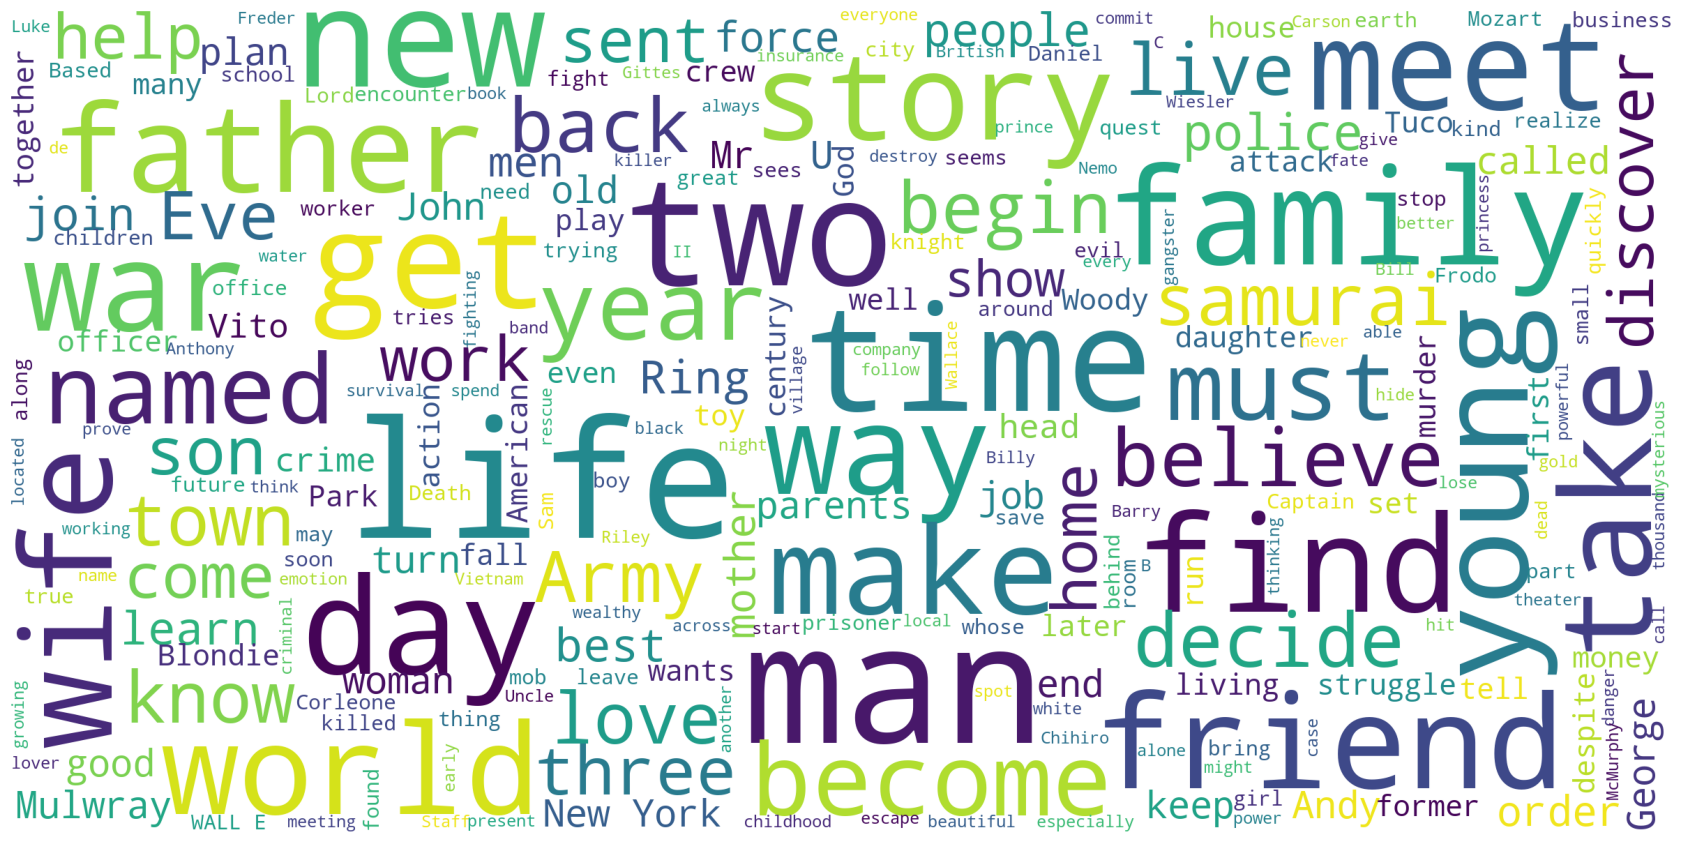

In [768]:
wordcloud = WordCloud(background_color='white',
        stopwords=new_stopwords_list,
        max_words=300,
        max_font_size=40,
        scale=6,
        random_state=1 ).generate(" ".join(df["story_line"]))

plt.figure(1, figsize=(30, 30))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## Users reviews

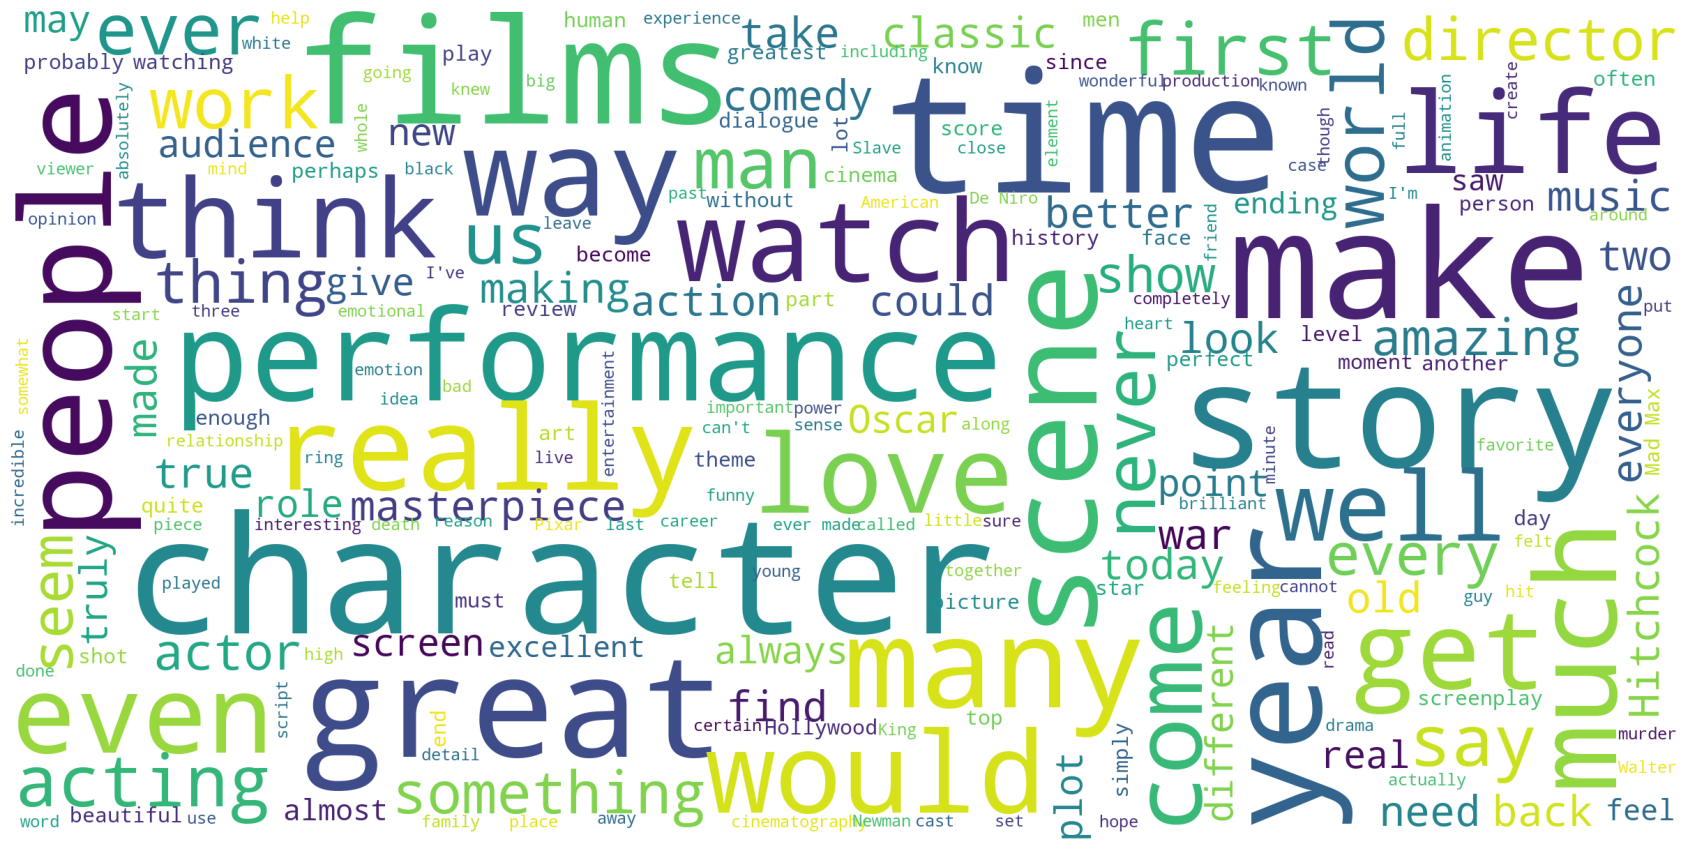

In [772]:
wordcloud = WordCloud(background_color='white',
        stopwords=new_stopwords_list,
        max_words=300,
        max_font_size=40,
        scale=6,
        random_state=1 ).generate(" ".join(df["users_reviews"]))

plt.figure(1, figsize=(30, 30))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()